In [3]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
#Import Libraries
import pandas as pd
import random
import os
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def seed_everything(seed):
  random.seed(seed)
  os.environ['PYTHONHASHEED'] = str(seed)
  np.random.seed(seed)
  
seed_everything(42)

In [4]:
train_df = pd.read_csv("/content/drive/MyDrive/DACON/LG/train.csv")
train_df

,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,TRAIN_00001,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,...,29.632,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304
1,TRAIN_00002,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,...,33.179,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438
2,TRAIN_00003,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,...,31.801,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370
3,TRAIN_00004,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,...,34.503,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345
4,TRAIN_00005,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,...,32.602,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,TRAIN_39603,66.465,103.320,62.27,1,103.150,66.825,30.20,77.83,298.05,...,29.194,16.582,3.410,-26.486,-26.581,-22.772,24.261,-26.491,-26.584,-26.580
39603,TRAIN_39604,66.465,103.321,62.77,1,102.021,66.825,29.21,102.25,270.67,...,29.859,15.659,3.406,-27.308,-27.203,-24.674,23.427,-27.250,-27.334,-27.325
39604,TRAIN_39605,68.504,103.320,64.67,1,103.144,68.864,29.96,102.61,198.07,...,24.720,16.823,3.215,-26.502,-26.687,-22.577,24.301,-26.388,-26.425,-26.601
39605,TRAIN_39606,66.465,103.320,63.67,1,102.025,67.845,30.30,112.60,275.52,...,26.412,15.757,4.216,-26.760,-26.634,-24.066,23.305,-26.536,-26.751,-26.635


In [6]:
test_x = pd.read_csv("/content/drive/MyDrive/DACON/LG/test.csv")
test_x

,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,TEST_00001,68.504,103.321,76.67,1,101.867,73.963,30.51,63.57,239.80,...,1,1,17227.63,138.130429,129.460682,141.506570,133.427229,129.711498,133.138096,121.859684
1,TEST_00002,67.485,103.320,69.37,1,101.992,67.845,28.03,116.99,189.23,...,1,1,17134.53,136.148839,128.266277,145.911745,131.196417,132.411480,133.629025,124.178623
2,TEST_00003,69.524,103.320,68.97,1,101.884,77.022,29.65,205.68,214.93,...,1,1,14860.83,120.447446,119.988804,132.099908,120.450155,130.051708,128.252972,114.475628
3,TEST_00004,69.524,103.320,65.87,1,101.866,73.963,28.15,103.38,180.80,...,1,1,15252.53,133.994695,125.069180,147.507669,123.142653,125.963665,139.666592,126.589253
4,TEST_00005,73.603,103.321,66.67,1,101.891,74.983,29.92,71.20,231.93,...,1,1,10752.23,137.918202,135.116192,138.600473,127.173033,137.252712,134.411335,124.020016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39603,TEST_39604,68.504,103.320,63.97,1,103.157,68.864,29.49,116.35,284.16,...,1,1,62123.53,127.741246,126.494312,139.119905,125.271109,128.284572,140.176945,128.292843
39604,TEST_39605,68.504,103.320,61.37,1,103.137,68.864,32.29,116.28,272.41,...,1,1,61844.13,127.767377,124.062809,138.238664,119.879393,127.322529,137.312047,131.570614
39605,TEST_39606,69.524,103.320,63.67,1,103.149,69.884,30.00,113.05,295.54,...,1,1,60277.53,128.593640,124.774037,138.659624,123.999571,126.075542,135.656132,127.671108
39606,TEST_39607,67.485,103.321,61.77,1,103.148,67.845,32.05,115.05,267.26,...,1,1,60236.73,121.110646,125.471699,134.989984,120.889578,129.296909,132.673977,131.882893


In [7]:
train_x = train_df.filter(regex='X')
train_y = train_df.filter(regex = "Y")

## Data Wrangling

In [16]:
train_x.isna().sum()

X_01    0
X_02    0
X_03    0
X_04    0
X_05    0
X_06    0
X_07    0
X_08    0
X_09    0
X_10    0
X_11    0
X_12    0
X_13    0
X_14    0
X_15    0
X_16    0
X_17    0
X_18    0
X_19    0
X_20    0
X_21    0
X_22    0
X_23    0
X_24    0
X_25    0
X_26    0
X_27    0
X_28    0
X_29    0
X_30    0
X_31    0
X_32    0
X_33    0
X_34    0
X_35    0
X_36    0
X_37    0
X_38    0
X_39    0
X_40    0
X_41    0
X_42    0
X_43    0
X_44    0
X_45    0
X_46    0
X_47    0
X_48    0
X_49    0
X_50    0
X_51    0
X_52    0
X_53    0
X_54    0
X_55    0
X_56    0
dtype: int64

In [17]:
test_x.isna().sum()

ID      0
X_01    0
X_02    0
X_03    0
X_04    0
X_05    0
X_06    0
X_07    0
X_08    0
X_09    0
X_10    0
X_11    0
X_12    0
X_13    0
X_14    0
X_15    0
X_16    0
X_17    0
X_18    0
X_19    0
X_20    0
X_21    0
X_22    0
X_23    0
X_24    0
X_25    0
X_26    0
X_27    0
X_28    0
X_29    0
X_30    0
X_31    0
X_32    0
X_33    0
X_34    0
X_35    0
X_36    0
X_37    0
X_38    0
X_39    0
X_40    0
X_41    0
X_42    0
X_43    0
X_44    0
X_45    0
X_46    0
X_47    0
X_48    0
X_49    0
X_50    0
X_51    0
X_52    0
X_53    0
X_54    0
X_55    0
X_56    0
dtype: int64

In [18]:
train_x.describe()

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
count,39607.000000,39607.000000,39607.000000,39607.0,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,...,39607.0,39607.0,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000
mean,68.412040,103.320166,68.826354,1.0,102.337203,70.597211,29.407490,164.449320,225.397470,0.002449,...,1.0,1.0,16676.913639,130.774557,131.457418,138.587595,127.992420,128.014110,137.884711,128.441119
std,2.655983,0.000372,5.151167,0.0,0.548353,2.259820,7.338204,220.402444,66.734725,0.086255,...,0.0,0.0,8584.427420,5.989845,5.934313,6.469813,5.713153,5.433958,6.552101,5.444245
min,56.268000,103.320000,56.470000,1.0,101.774000,61.726000,14.140000,38.460000,37.580000,0.000000,...,1.0,1.0,3341.830000,21.800000,21.910000,23.100000,21.330000,21.340000,22.980000,21.410000
25%,66.465000,103.320000,65.070000,1.0,101.949000,68.864000,27.890000,105.990000,188.540000,0.000000,...,1.0,1.0,13093.930000,126.948571,127.669758,134.475401,124.374525,124.697879,133.744103,125.134713
50%,68.504000,103.320000,67.270000,1.0,102.006000,69.884000,28.840000,115.040000,234.450000,0.000000,...,1.0,1.0,15273.330000,130.723378,131.352856,138.525575,128.020010,128.098728,137.900952,128.414501
75%,69.524000,103.320000,71.770000,1.0,103.144000,71.923000,29.870000,132.620000,263.960000,0.000000,...,1.0,1.0,17560.180000,134.538998,135.170761,142.702448,131.618662,131.487423,142.073102,131.839764
max,84.820000,103.321000,89.170000,1.0,103.160000,87.219000,163.860000,2387.440000,637.490000,3.600000,...,1.0,1.0,114563.630000,162.619458,194.513195,173.438623,152.406630,175.052891,170.155980,155.277538


In [19]:
#x column's distplot
def show_dist_plot_x(columns,data):
    i = 0
    plt.figure(figsize=(24,16))
    plt.subplots(8,7,figsize=(24,16))
    for col in columns:
        i += 1
        plt.subplot(8,7,i)
        sns.distplot(data[col])
    plt.tight_layout()

#y column's distplot
def show_dist_plot_y(columns,data):
    i = 0
    plt.figure(figsize=(18,8))
    plt.subplots(2,7,figsize=(18,8))
    for col in columns:
        i += 1
        plt.subplot(2,7,i)
        sns.distplot(data[col],color='skyblue')
    plt.tight_layout()
    
#violinplot
def show_dist_plot_vio(columns,data):
    i = 0
    plt.figure(figsize=(24,16))
    plt.subplots(8,7,figsize=(24,16))
    for col in columns:
        i += 1
        plt.subplot(8,7,i)
        sns.boxplot(data[col],color='skyblue')
    plt.tight_layout()

#plot
def show_plot(data,columns):
    for col in columns:
        plt.figure(figsize=(36,12))
        plt.plot(data[col])
        plt.title(f'{col}', fontsize=40)
        plt.tight_layout()

<Figure size 1728x1152 with 0 Axes>

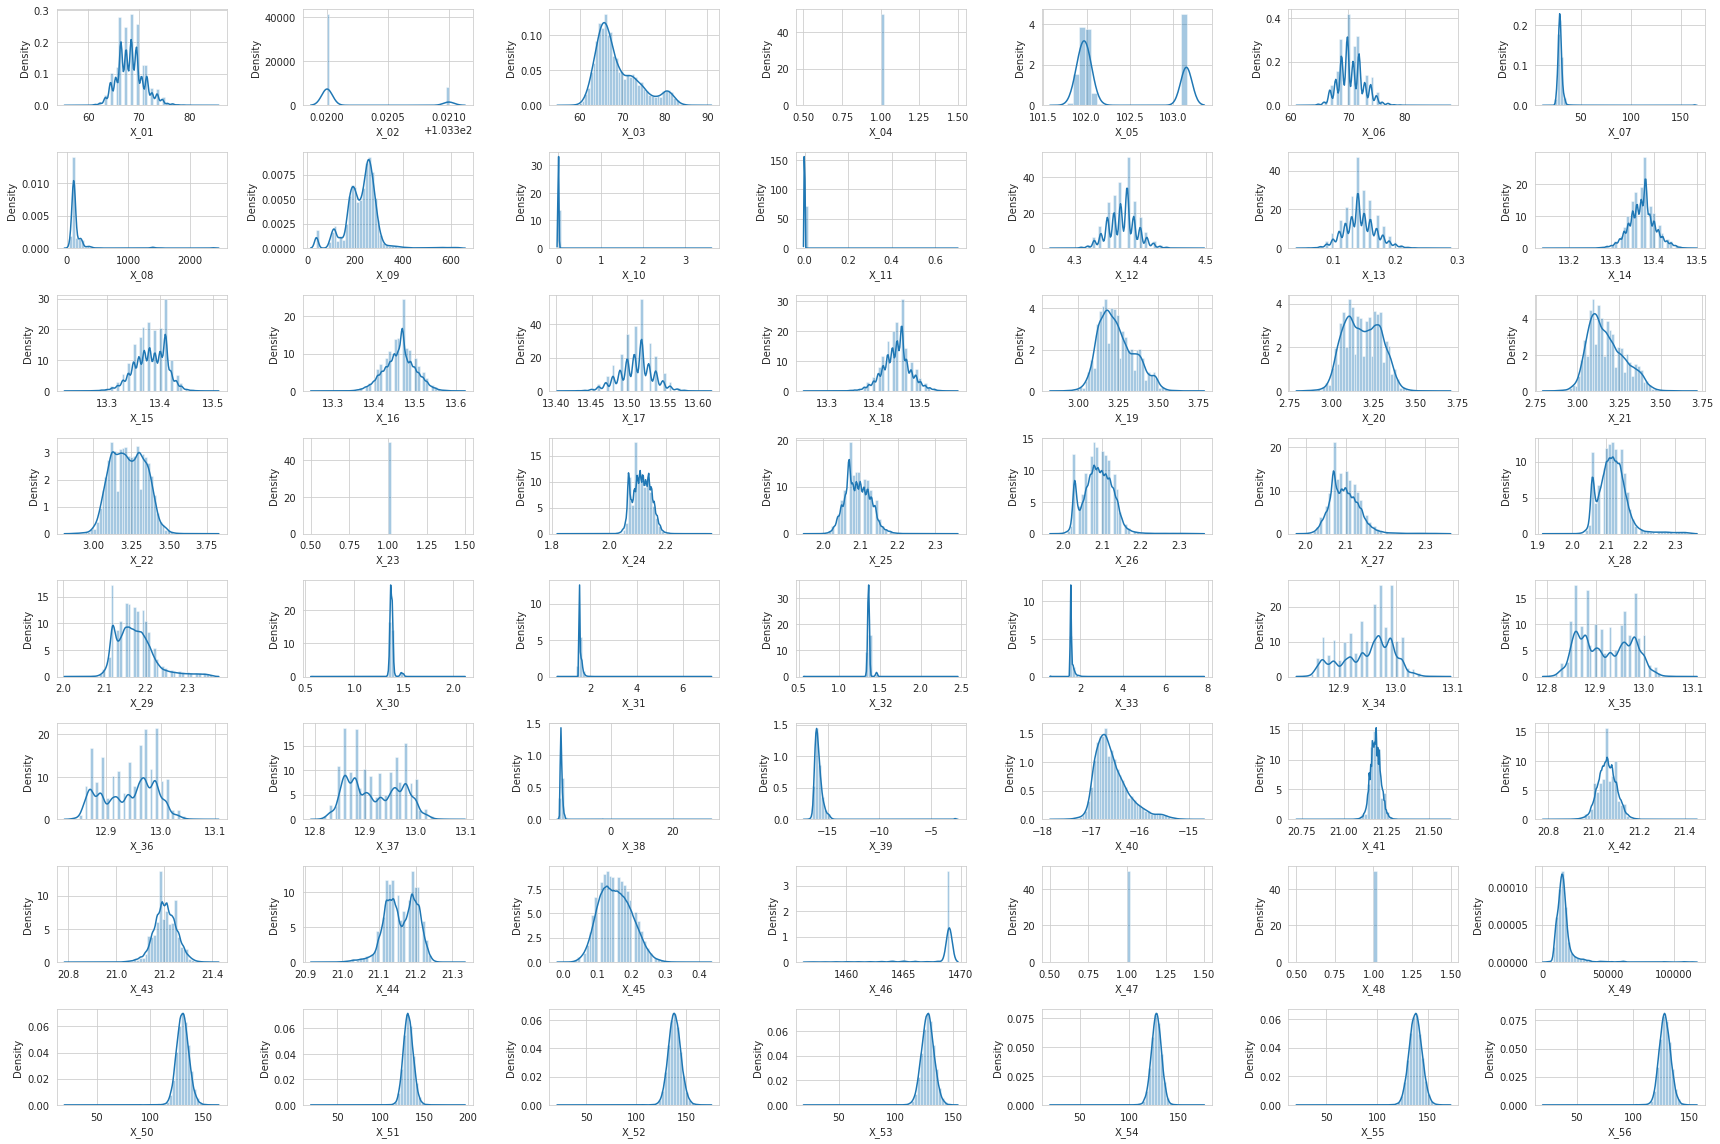

In [23]:
sns.set_style('whitegrid')
show_dist_plot_x(train_x.columns, train_x)

<Figure size 1728x1152 with 0 Axes>

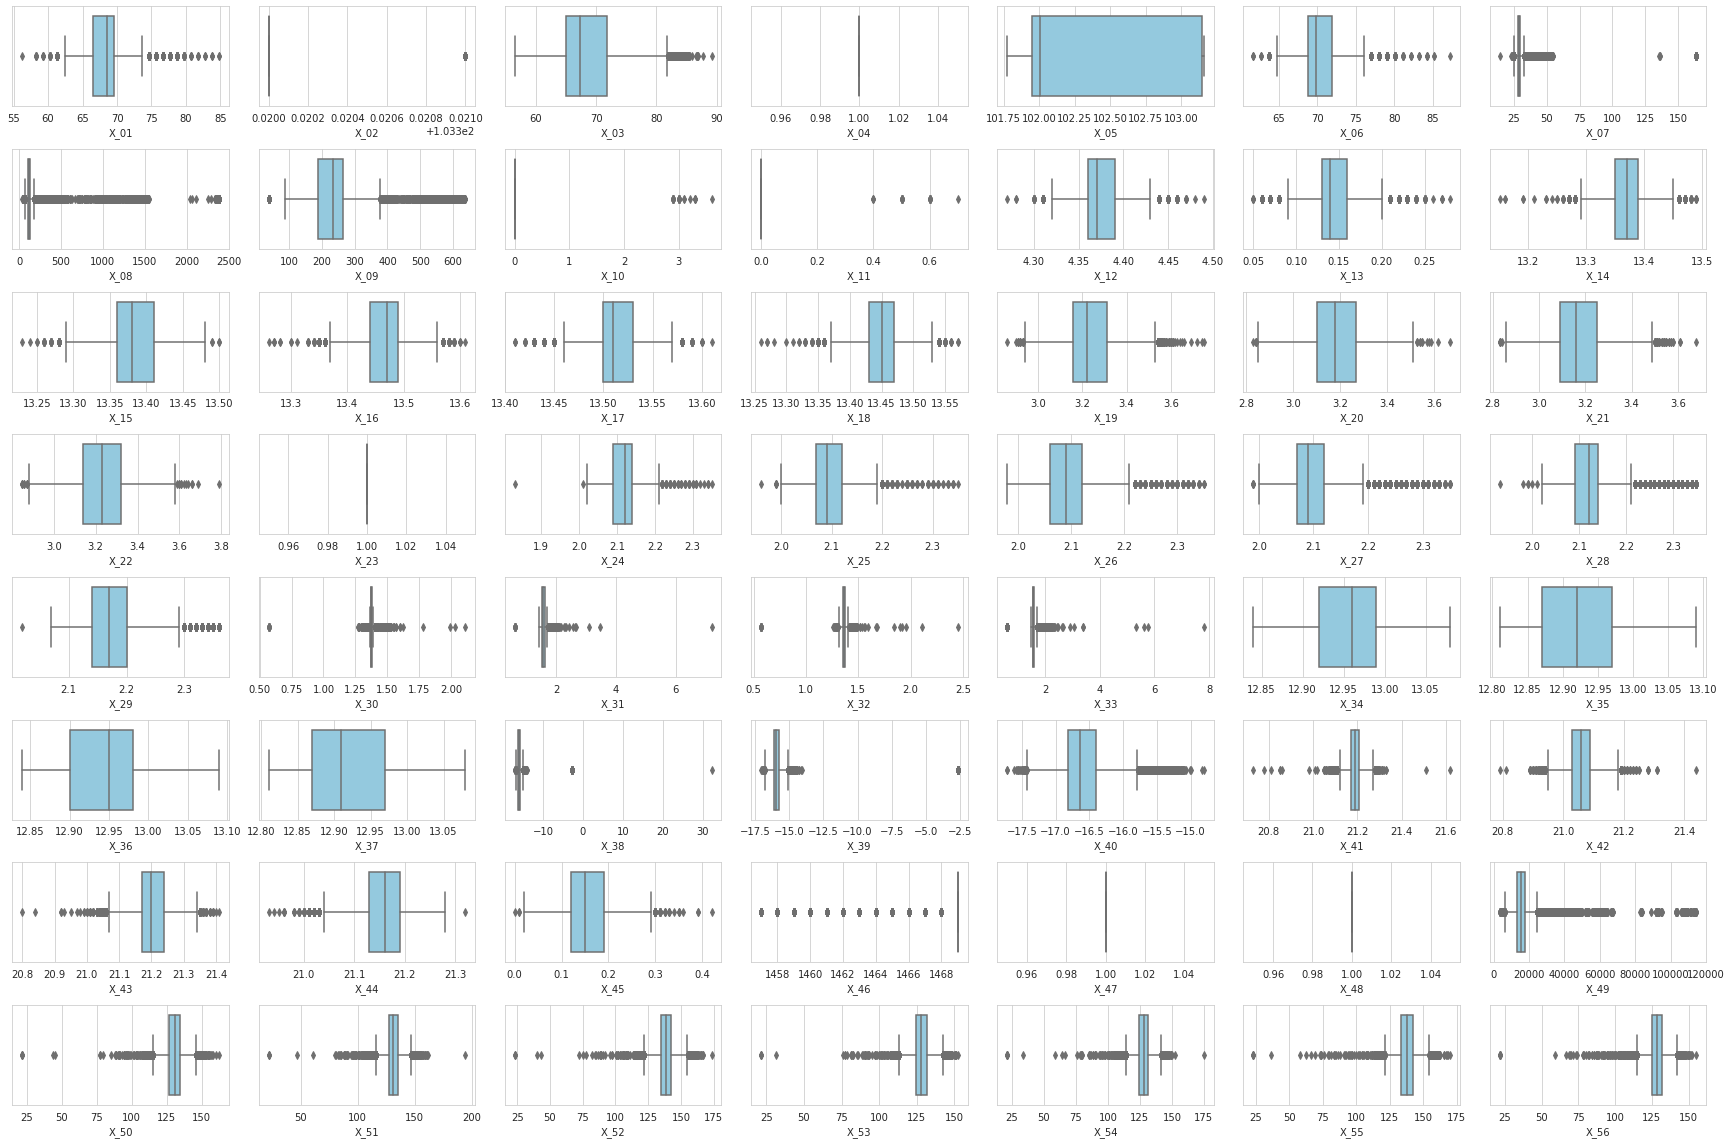

In [25]:
show_dist_plot_vio(train_x.columns, train_x)

<Figure size 1296x576 with 0 Axes>

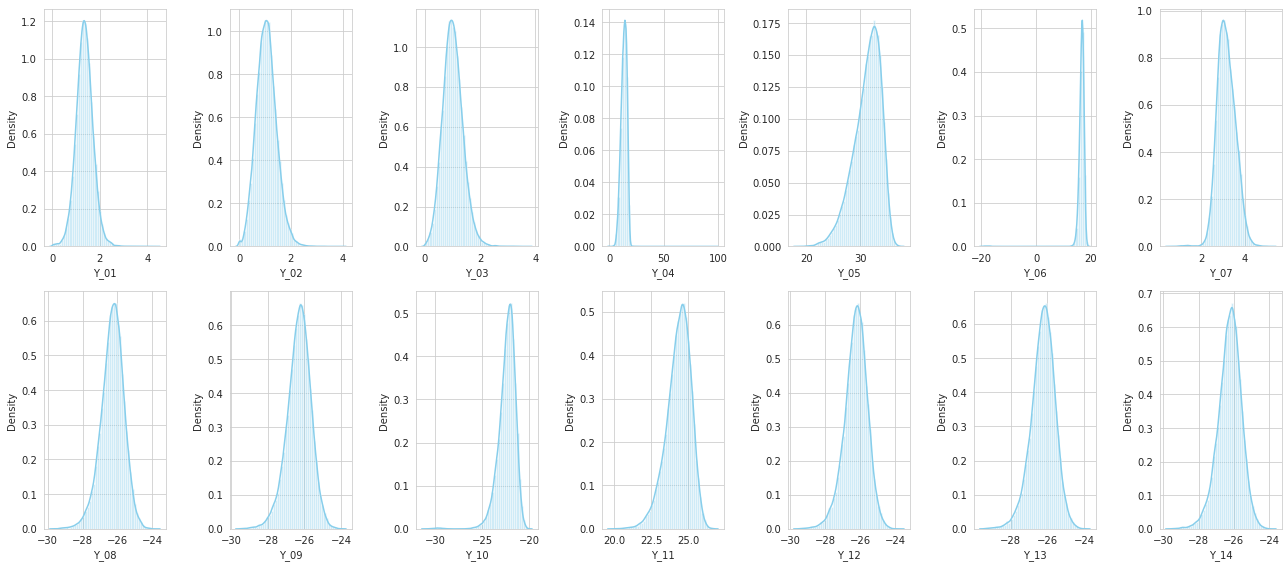

In [26]:
show_dist_plot_y(train_y.columns, train_y)

## EDA

####Features related testing 
These features will be deleted, because all of their components are 1

In [12]:
#first test
train_x["X_04"].value_counts()

1    39607
Name: X_04, dtype: int64

In [13]:
#second test
train_x["X_23"].value_counts()

1    39607
Name: X_23, dtype: int64

In [14]:
#third test
train_x["X_47"].value_counts()

1    39607
Name: X_47, dtype: int64

In [15]:
#forth test
train_x["X_48"].value_counts()

1    39607
Name: X_48, dtype: int64

####Heat dissipation material weight
Majority of values in X_10 and X_11 are null values, so they will be deleted

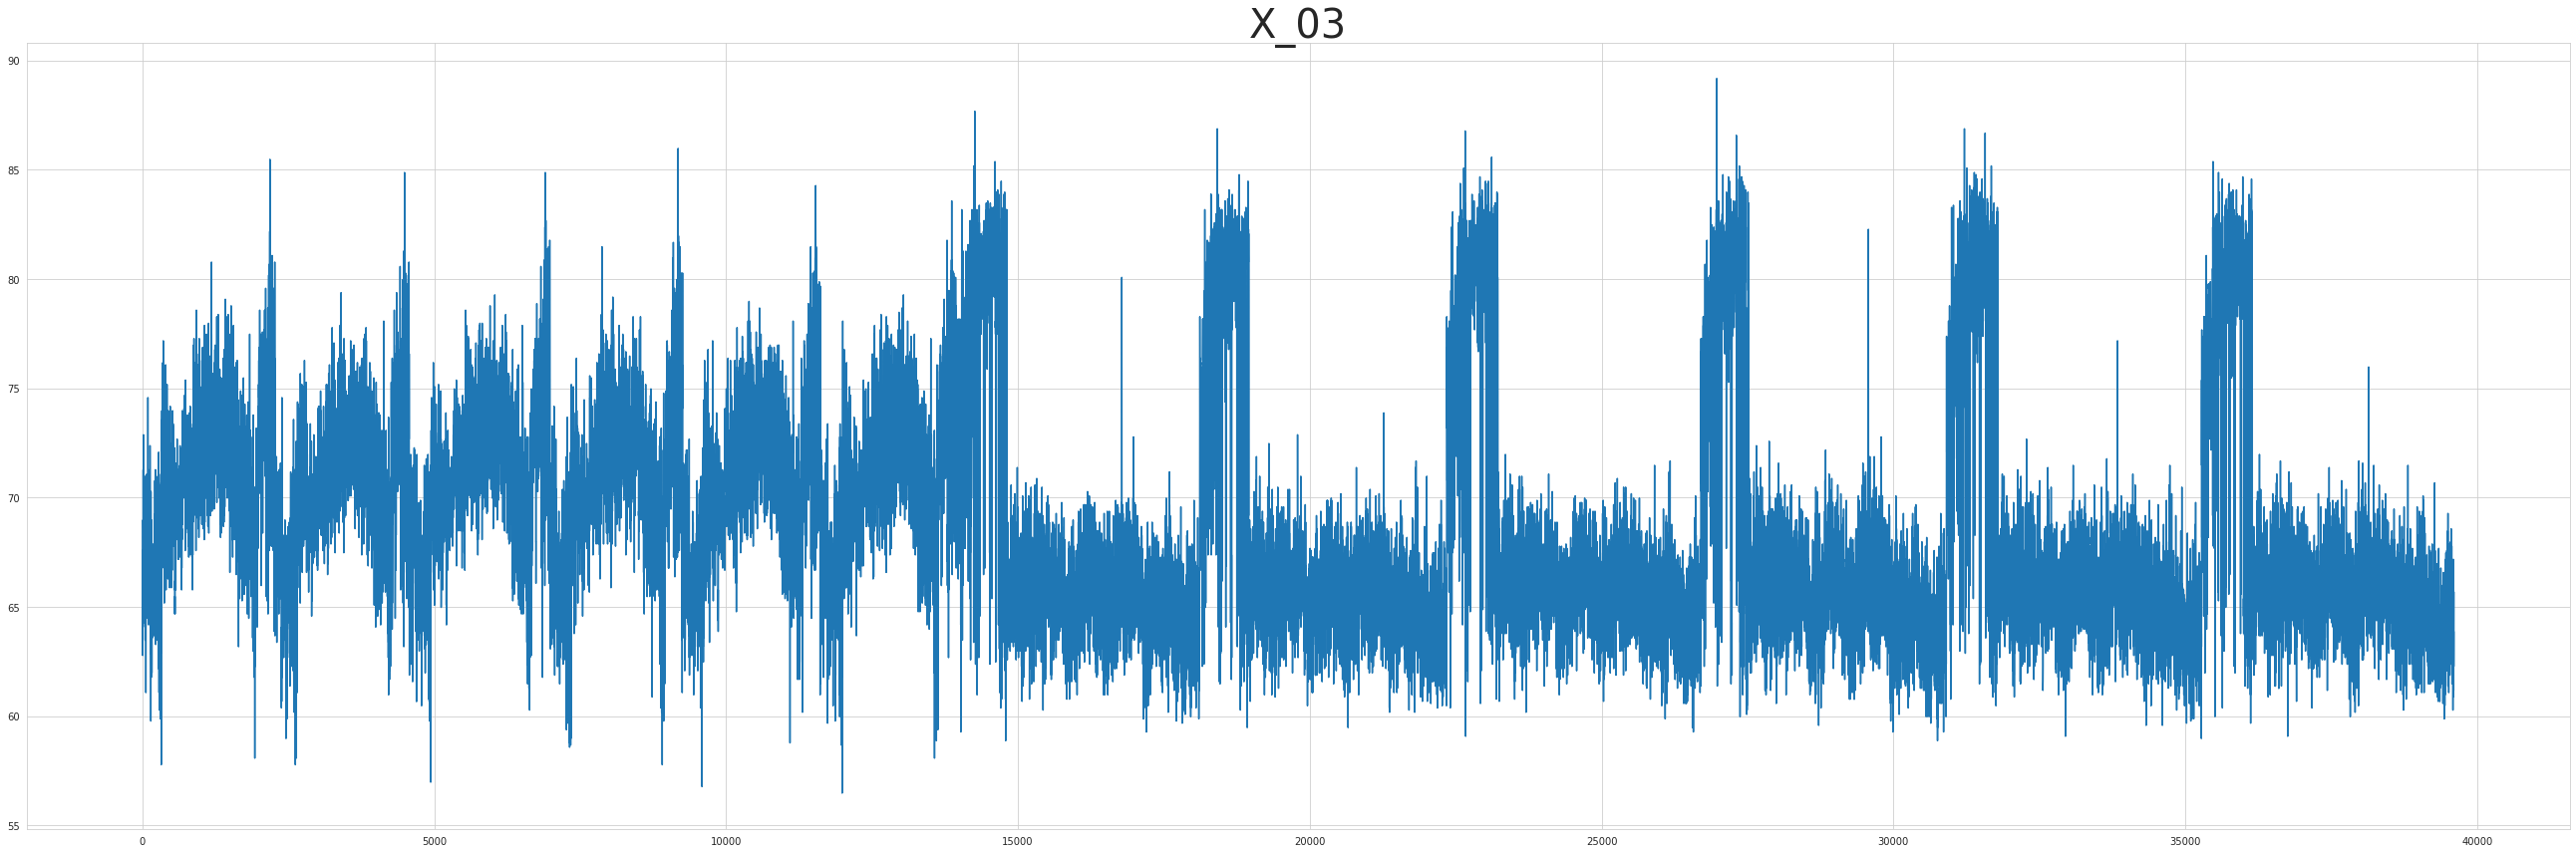

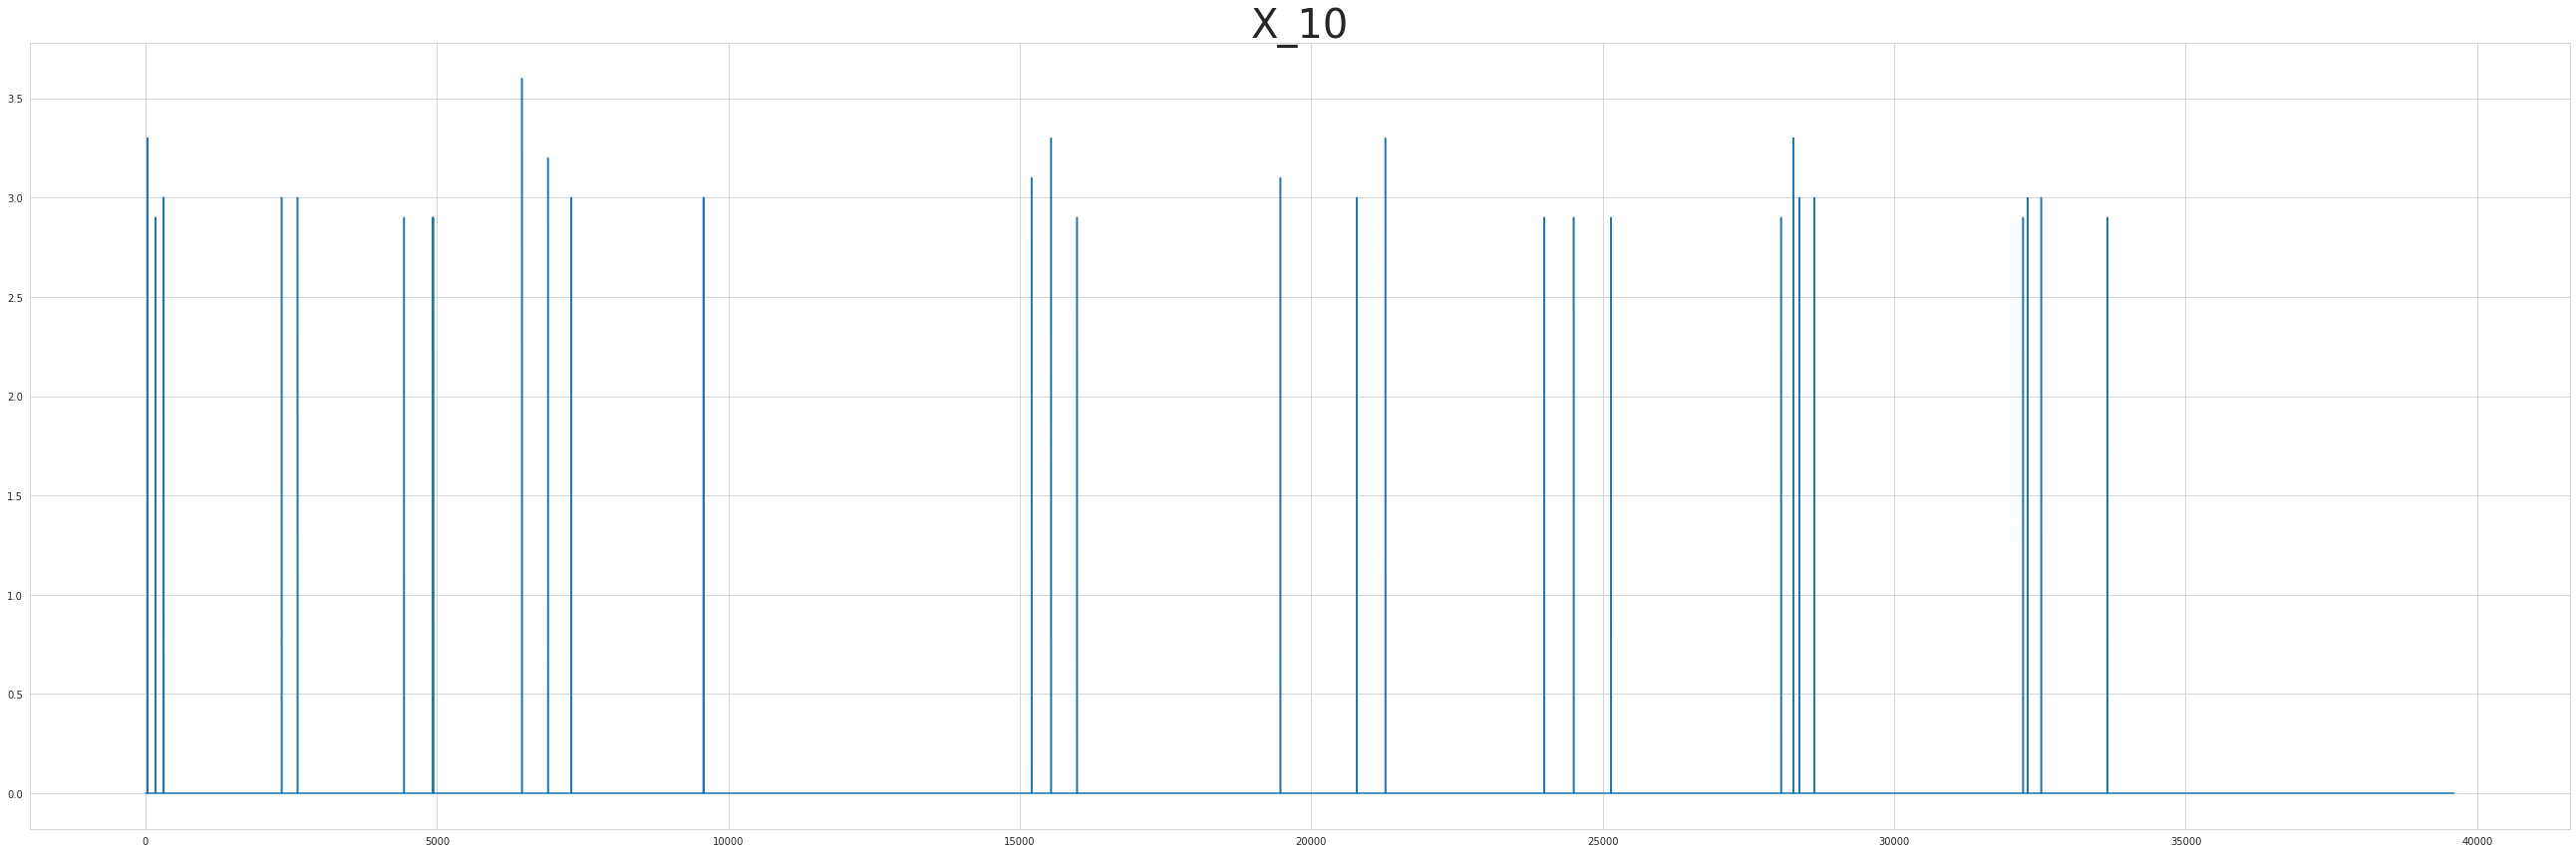

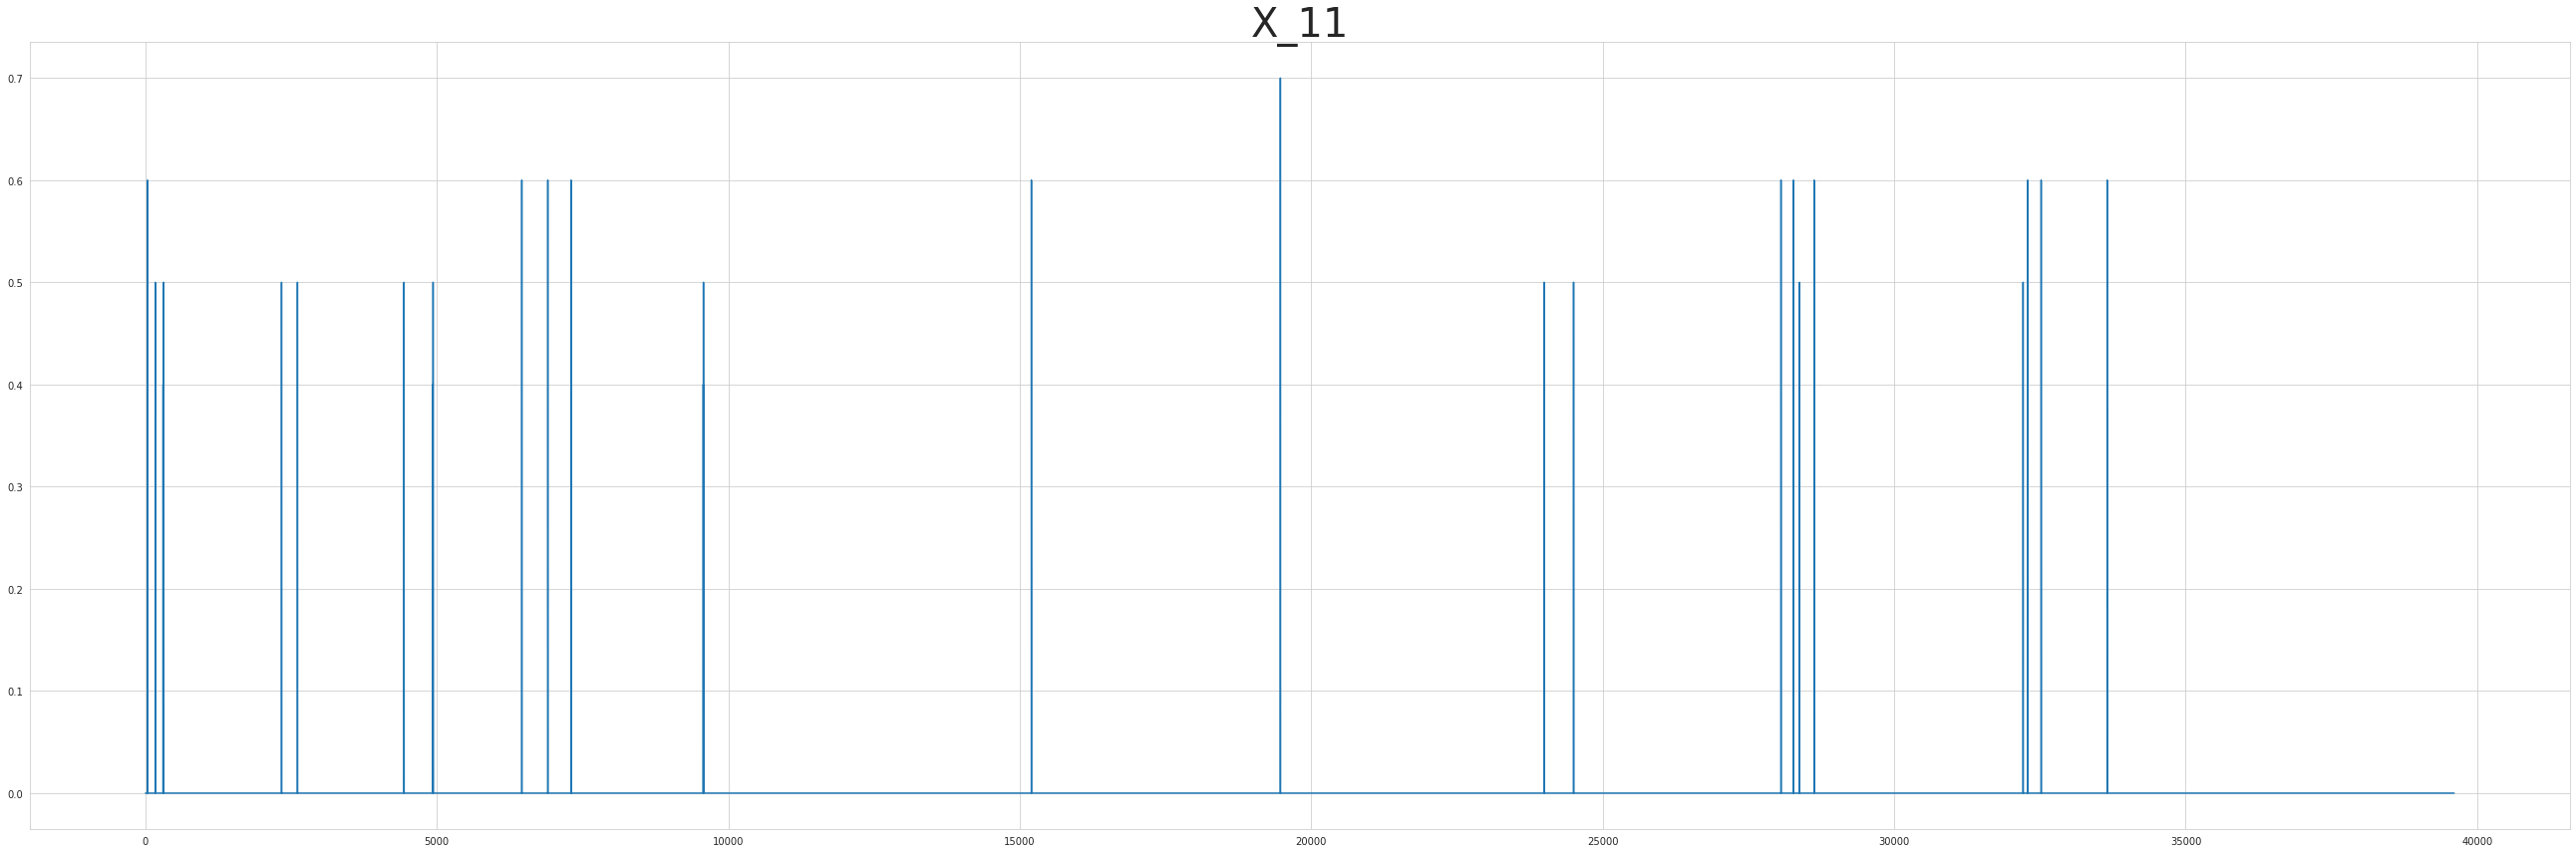

In [27]:
show_plot(train_x,["X_03", "X_10", "X_11"])

In [28]:
train_x["X_10"].value_counts()

0.0    39575
2.9       12
3.0       12
3.3        4
3.1        2
3.6        1
3.2        1
Name: X_10, dtype: int64

In [29]:
train_x["X_11"].value_counts()

0.0    39580
0.5       12
0.6       11
0.4        3
0.7        1
Name: X_11, dtype: int64

#### Area of heat dissipation material
There are many outliers in X_07 and X_08, so these values will be dealt with imputation

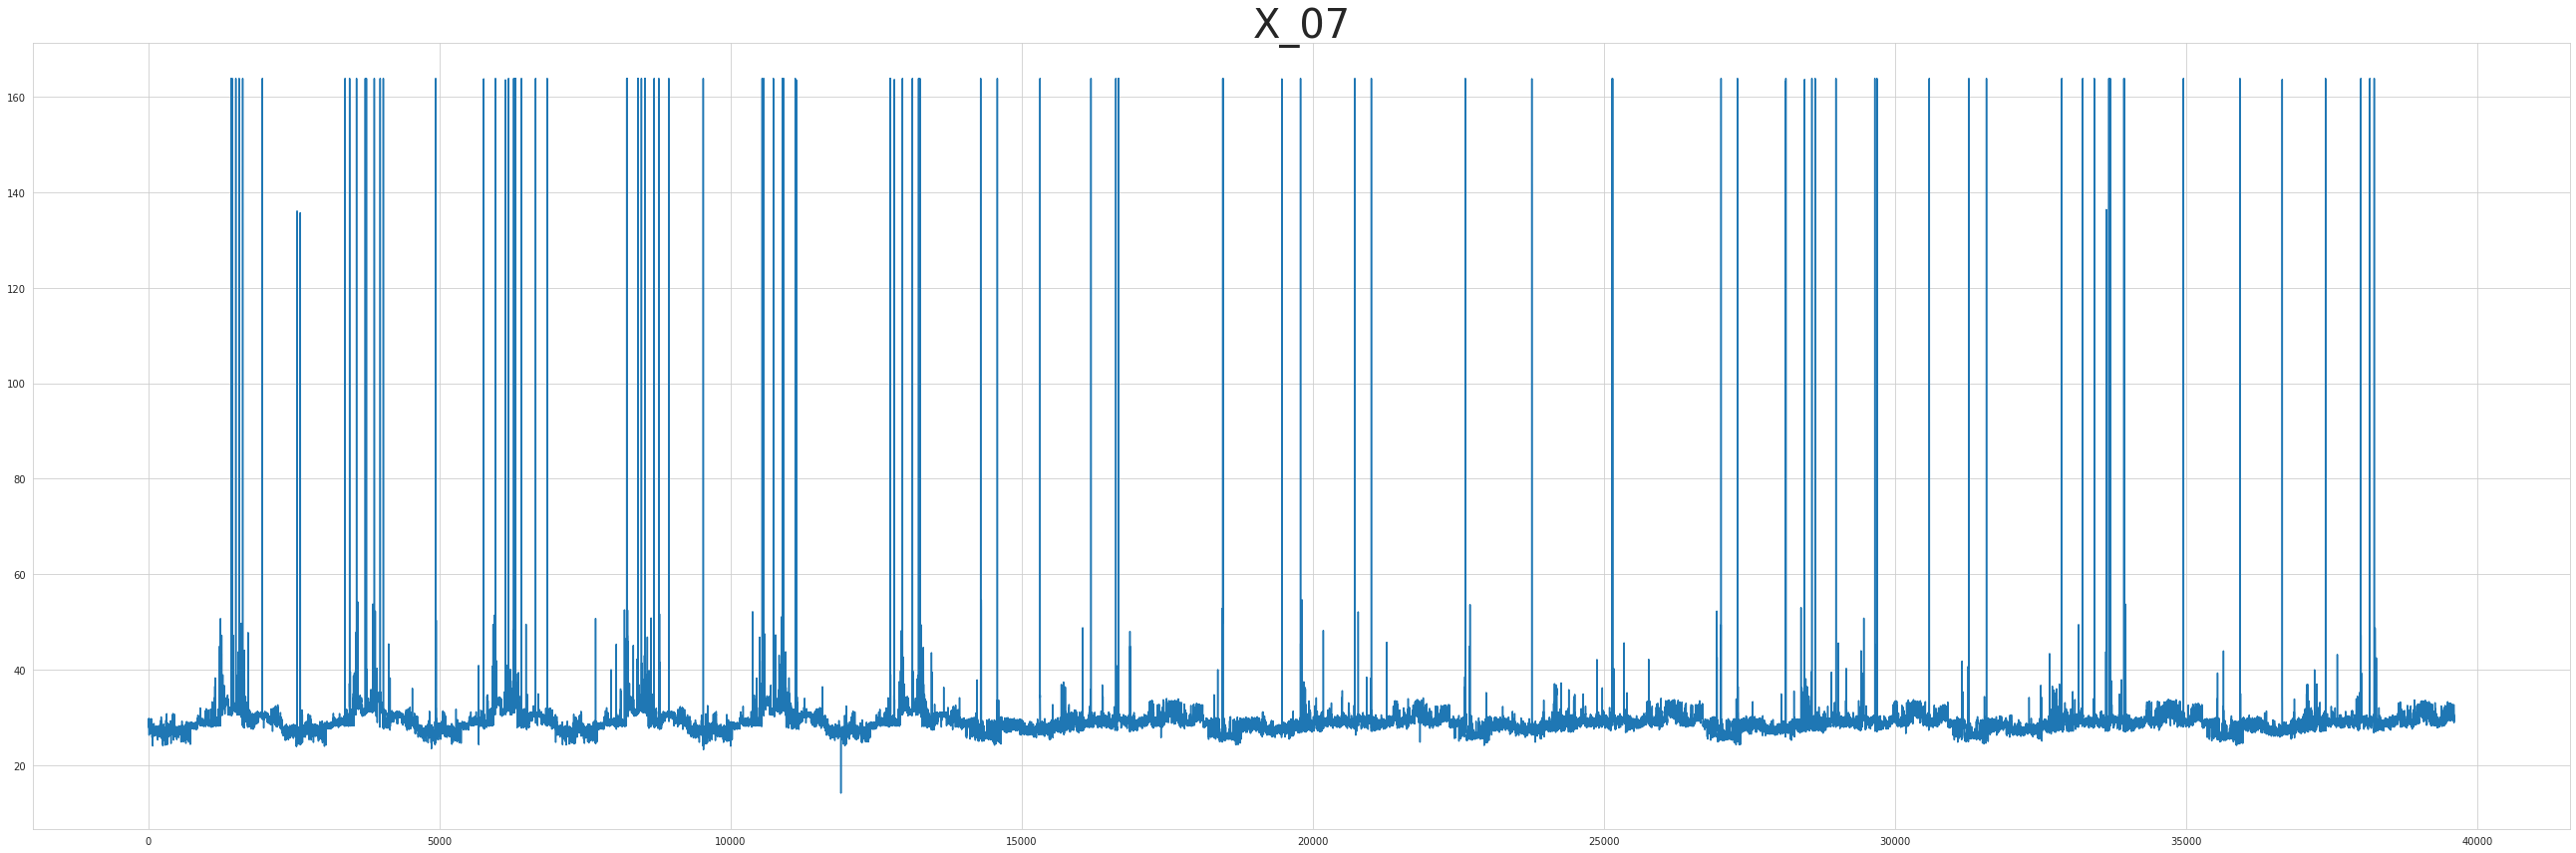

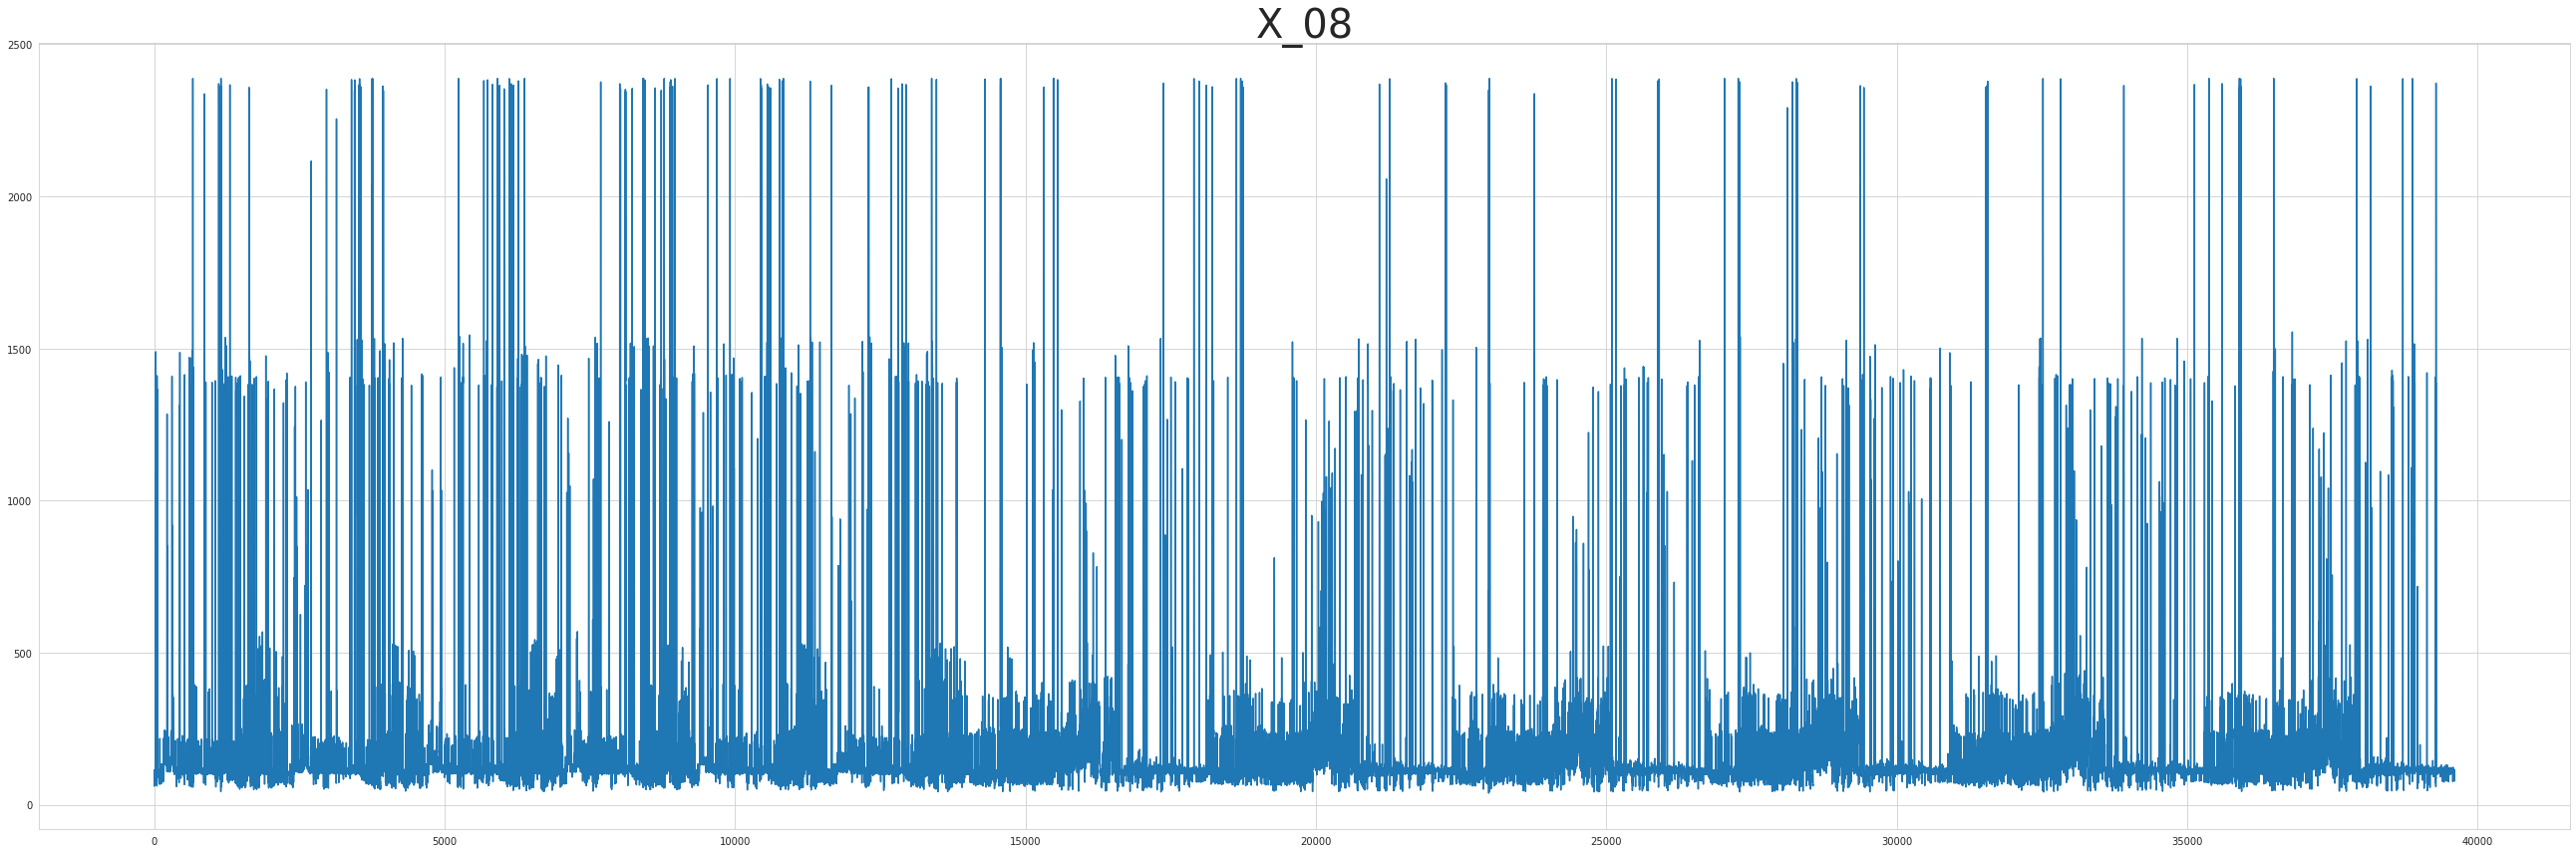

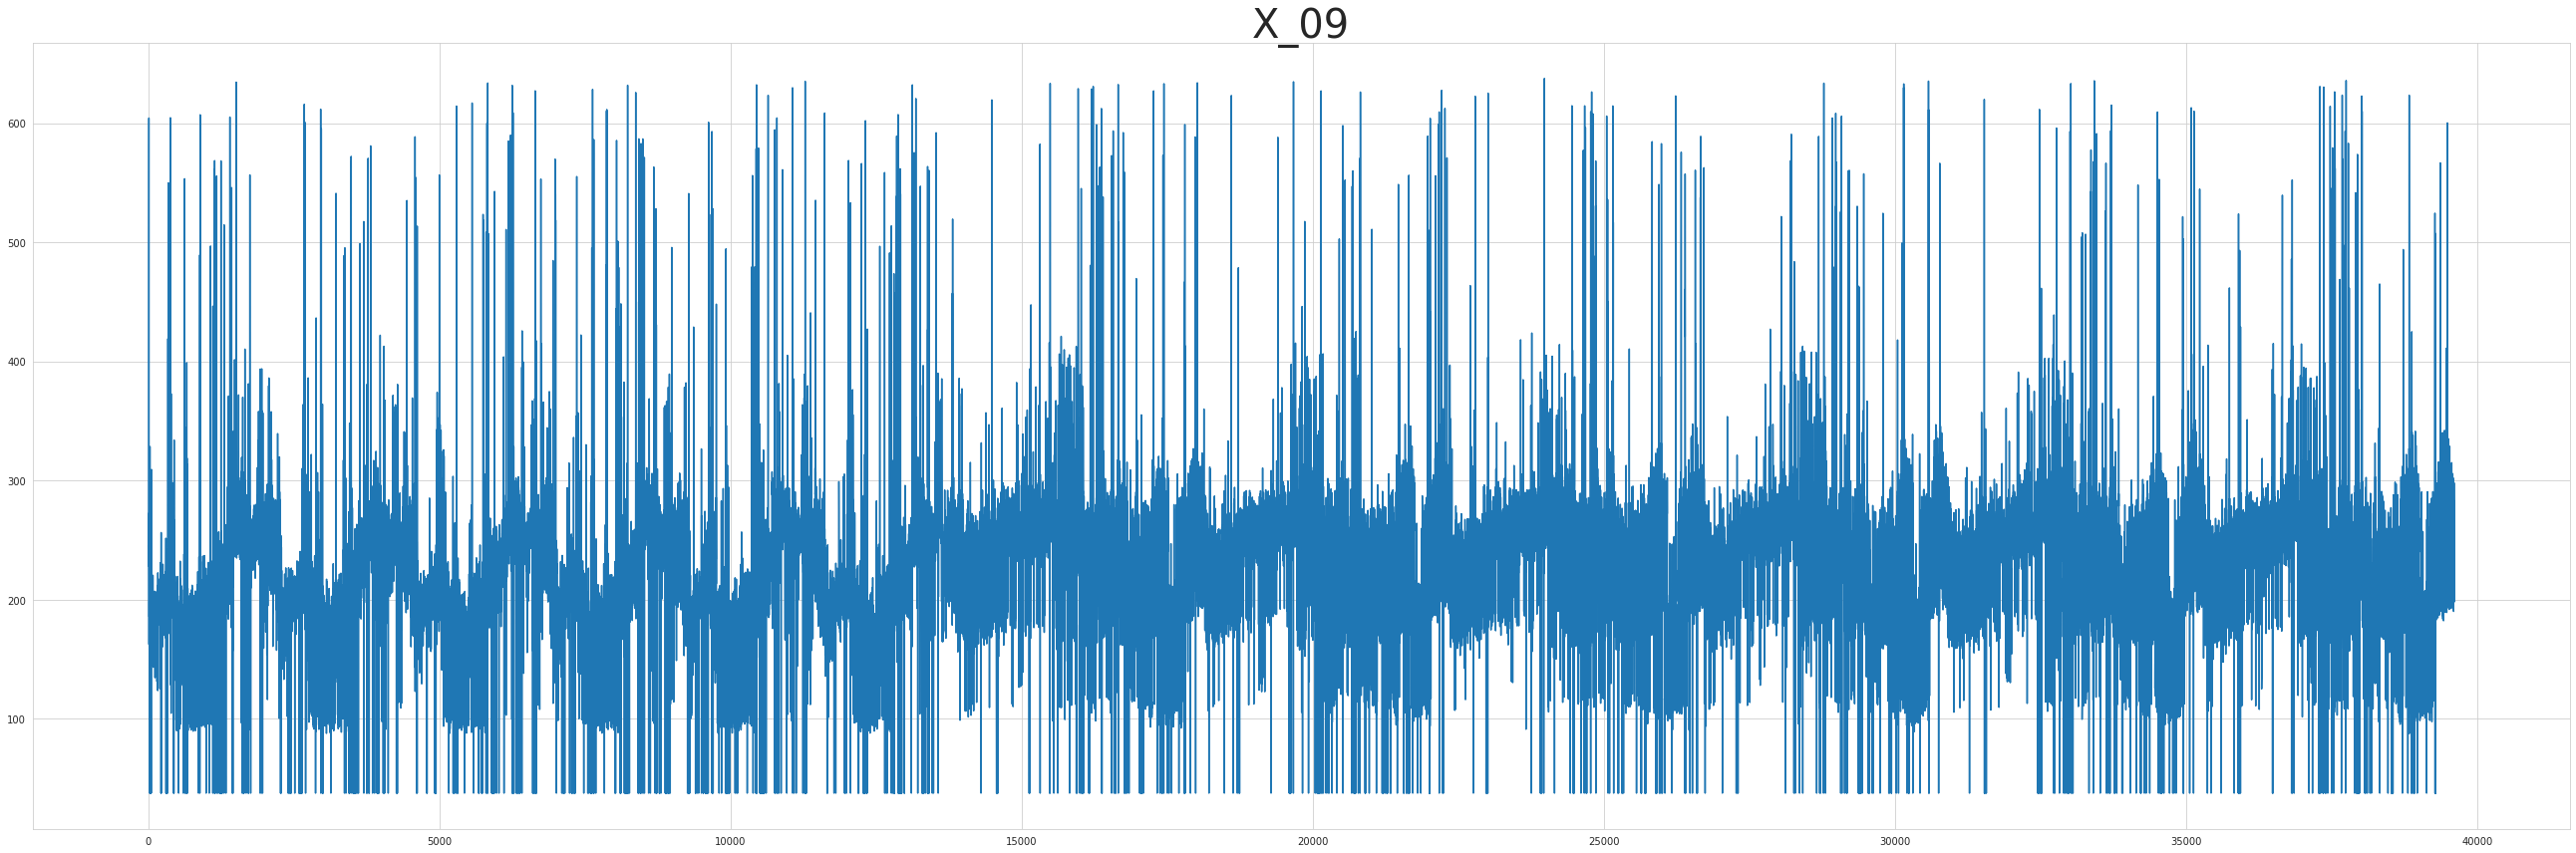

In [30]:
show_plot(train_x,["X_07", "X_08", "X_09"])

#### Housing PCB seating dimentsions (하우징 PCB 안착부 치수)
There are many outliers in X_38 and X_39, so these values will be dealt with imputation

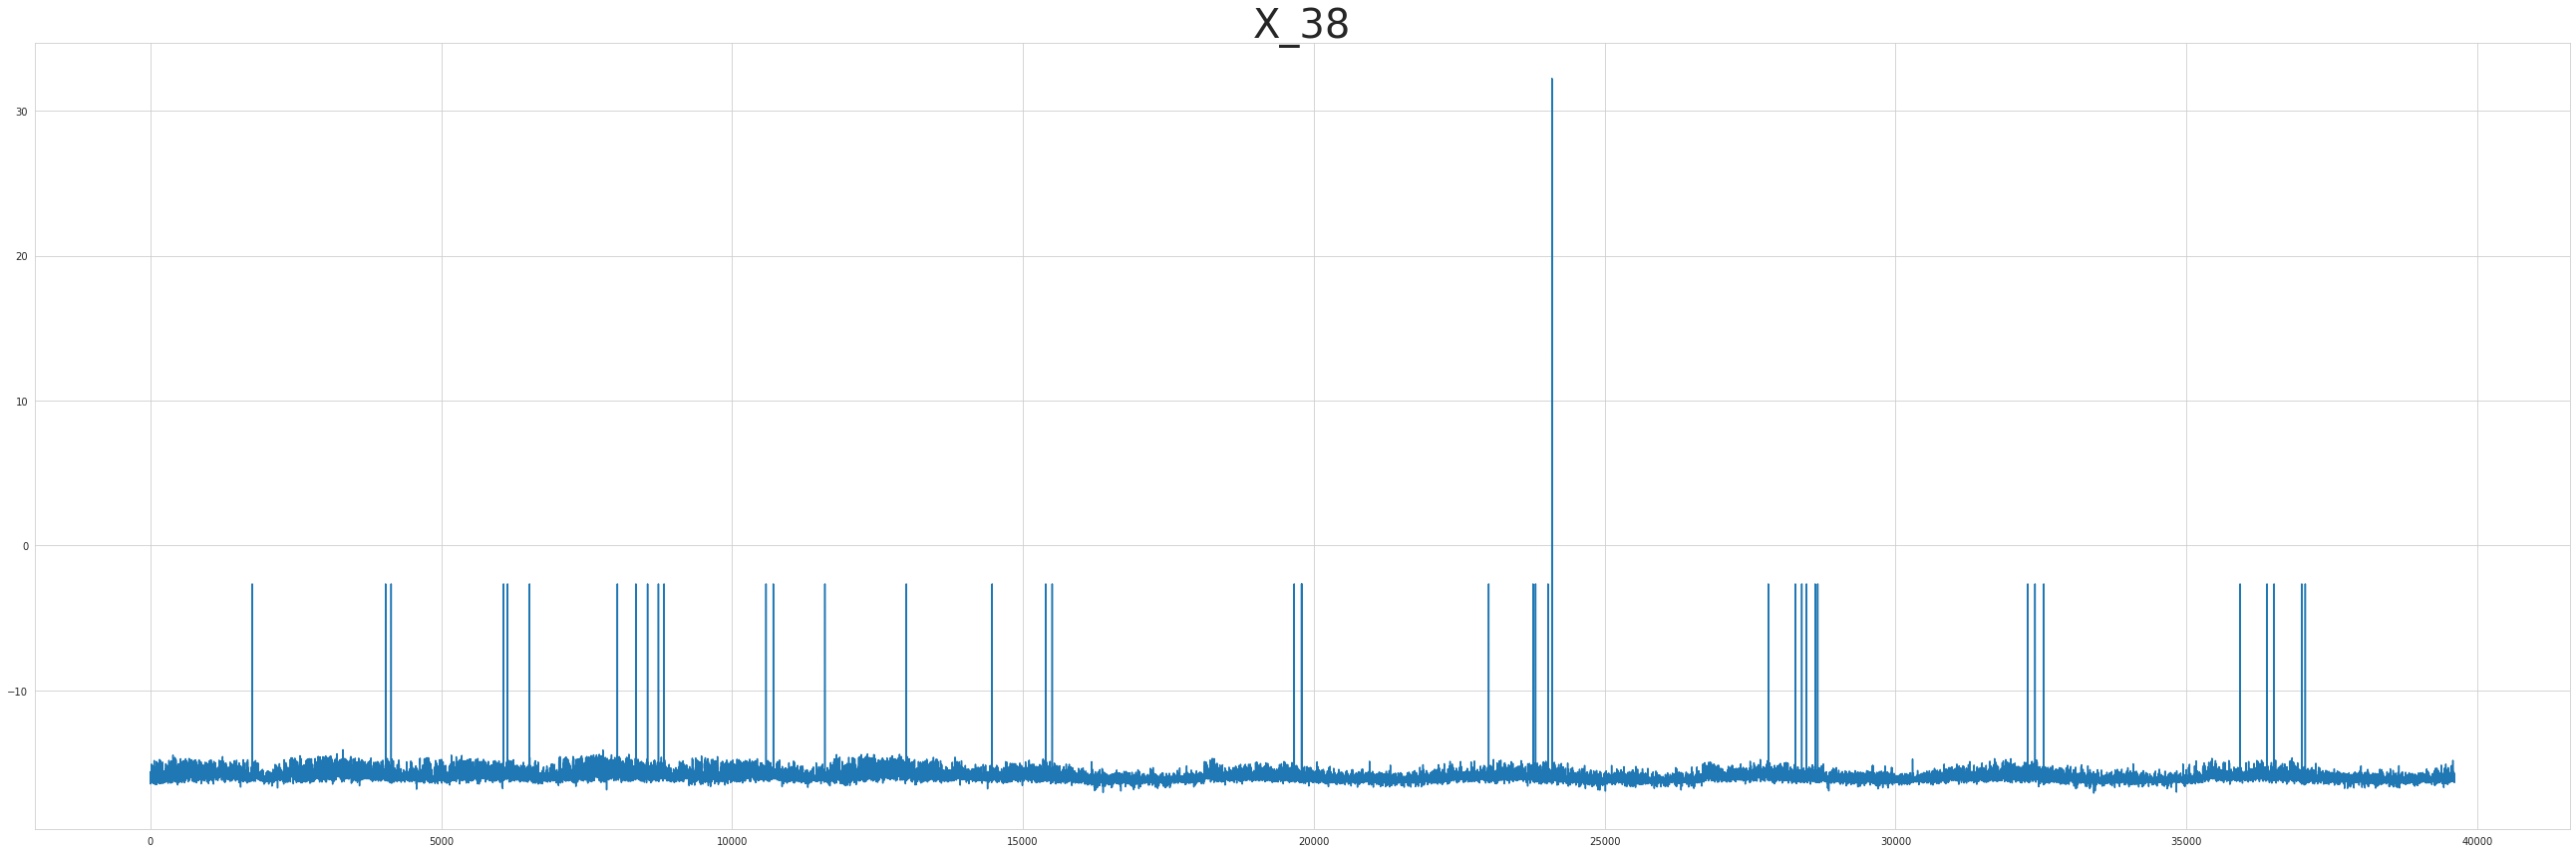

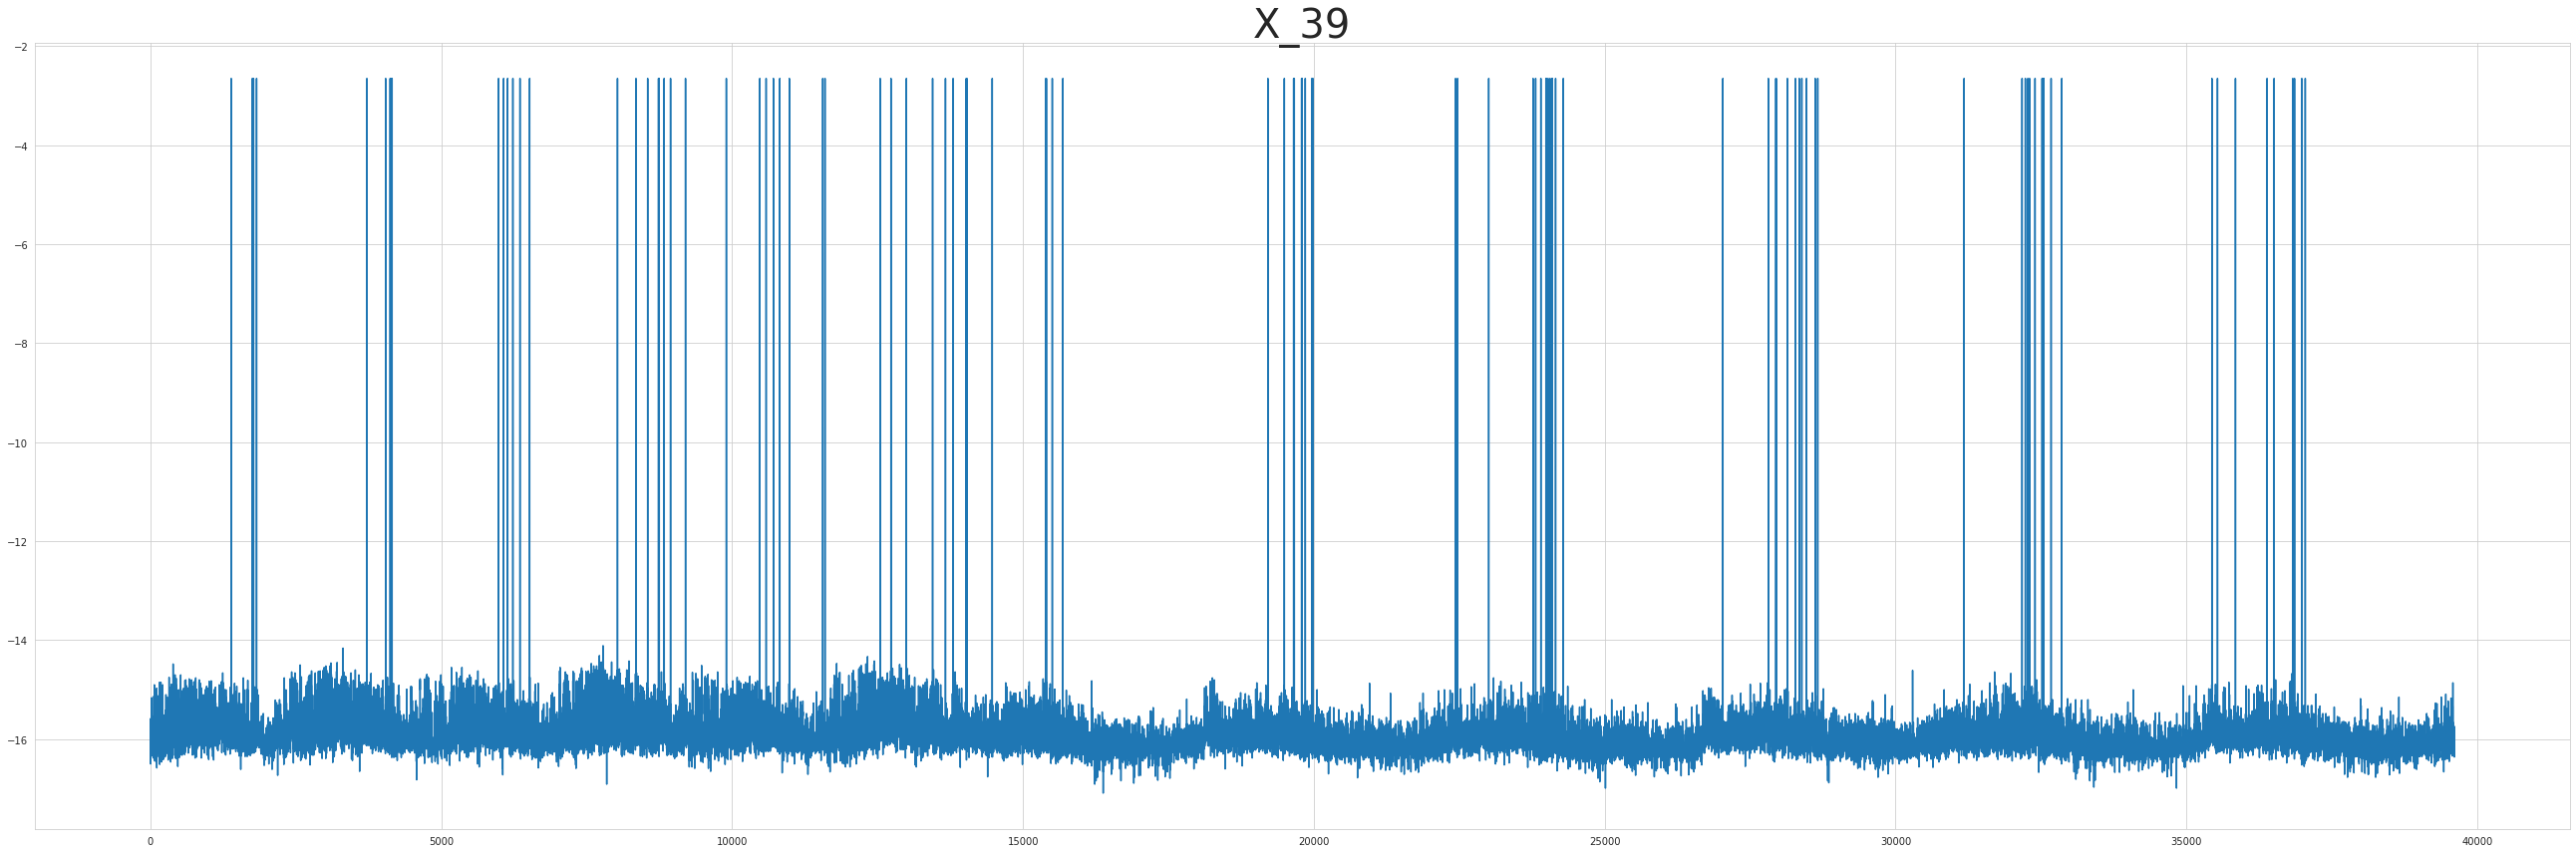

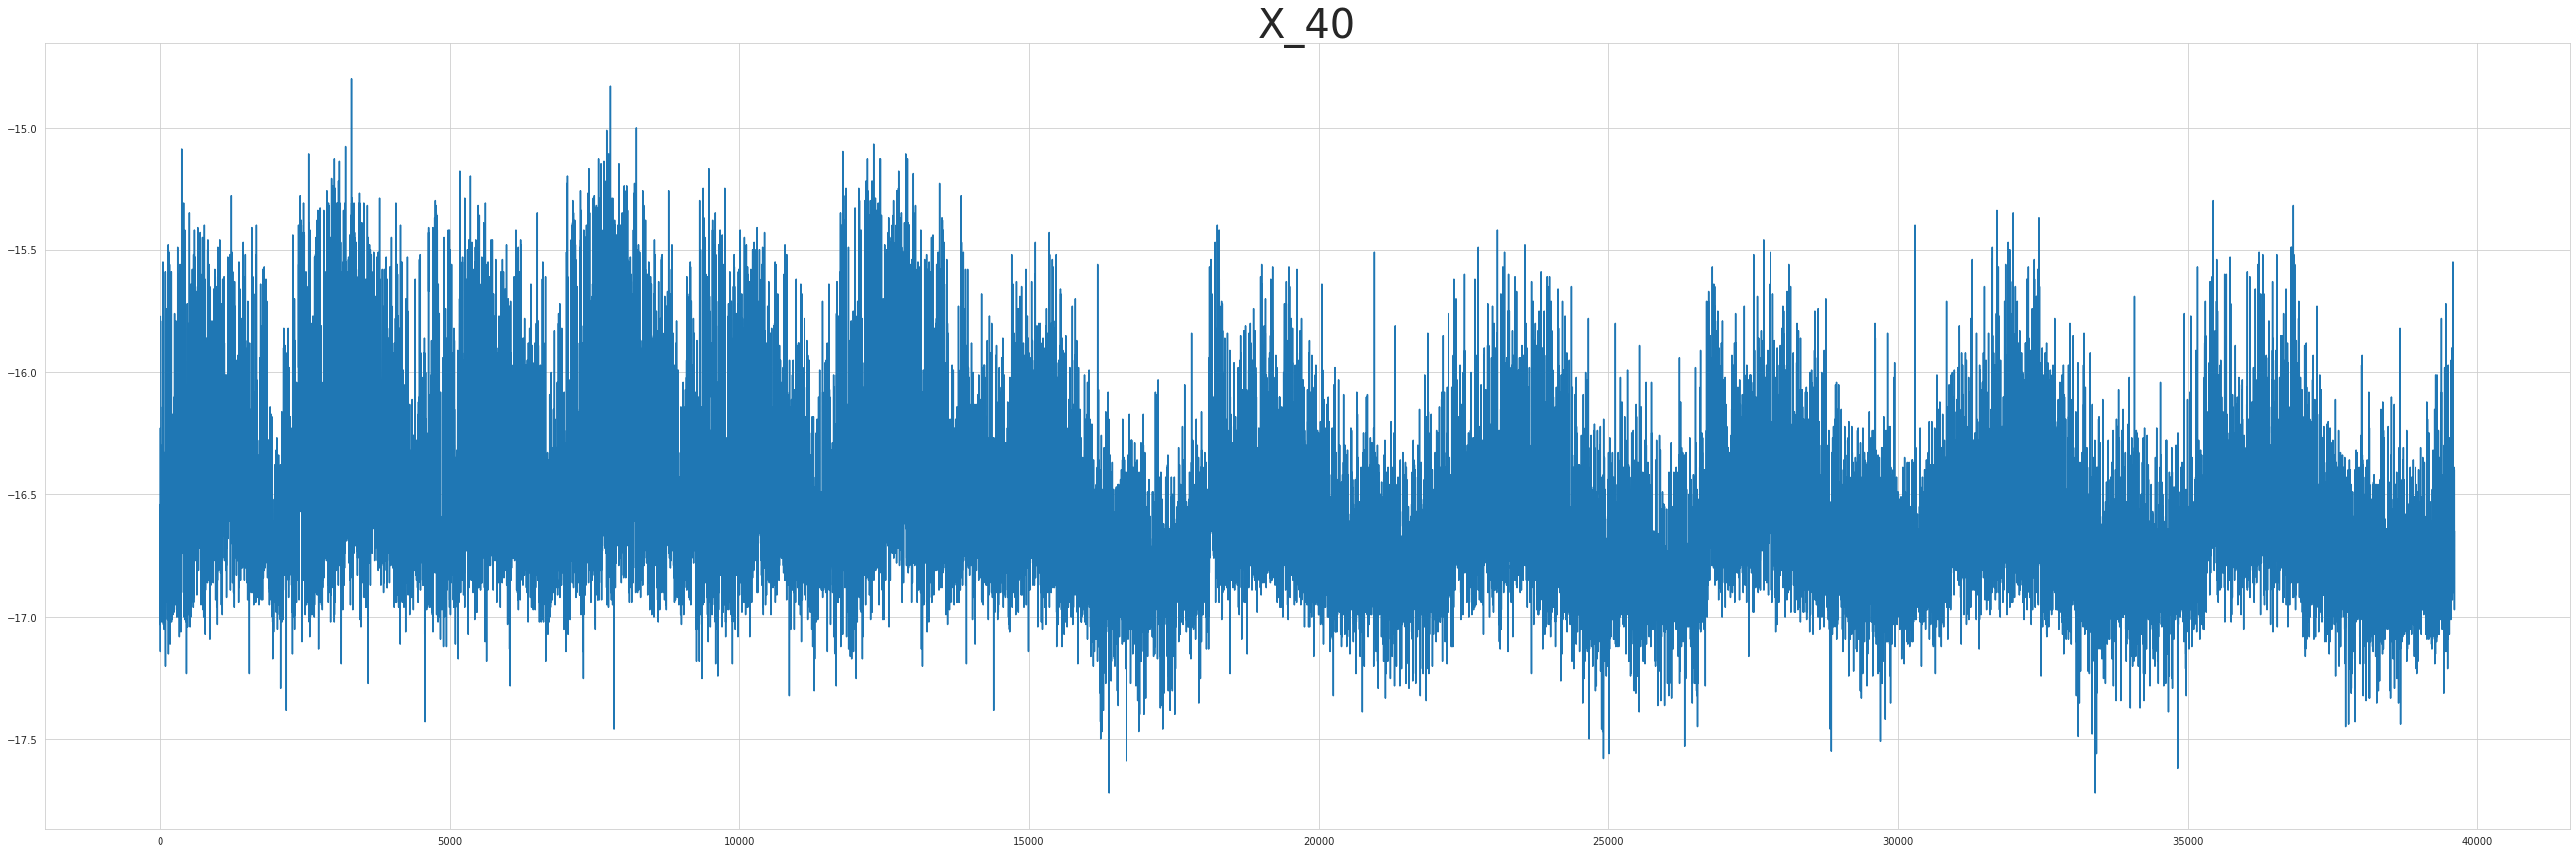

In [33]:
show_plot(train_x,["X_38", "X_39", "X_40"])

##Feature Engineering

### Dealing with X_38

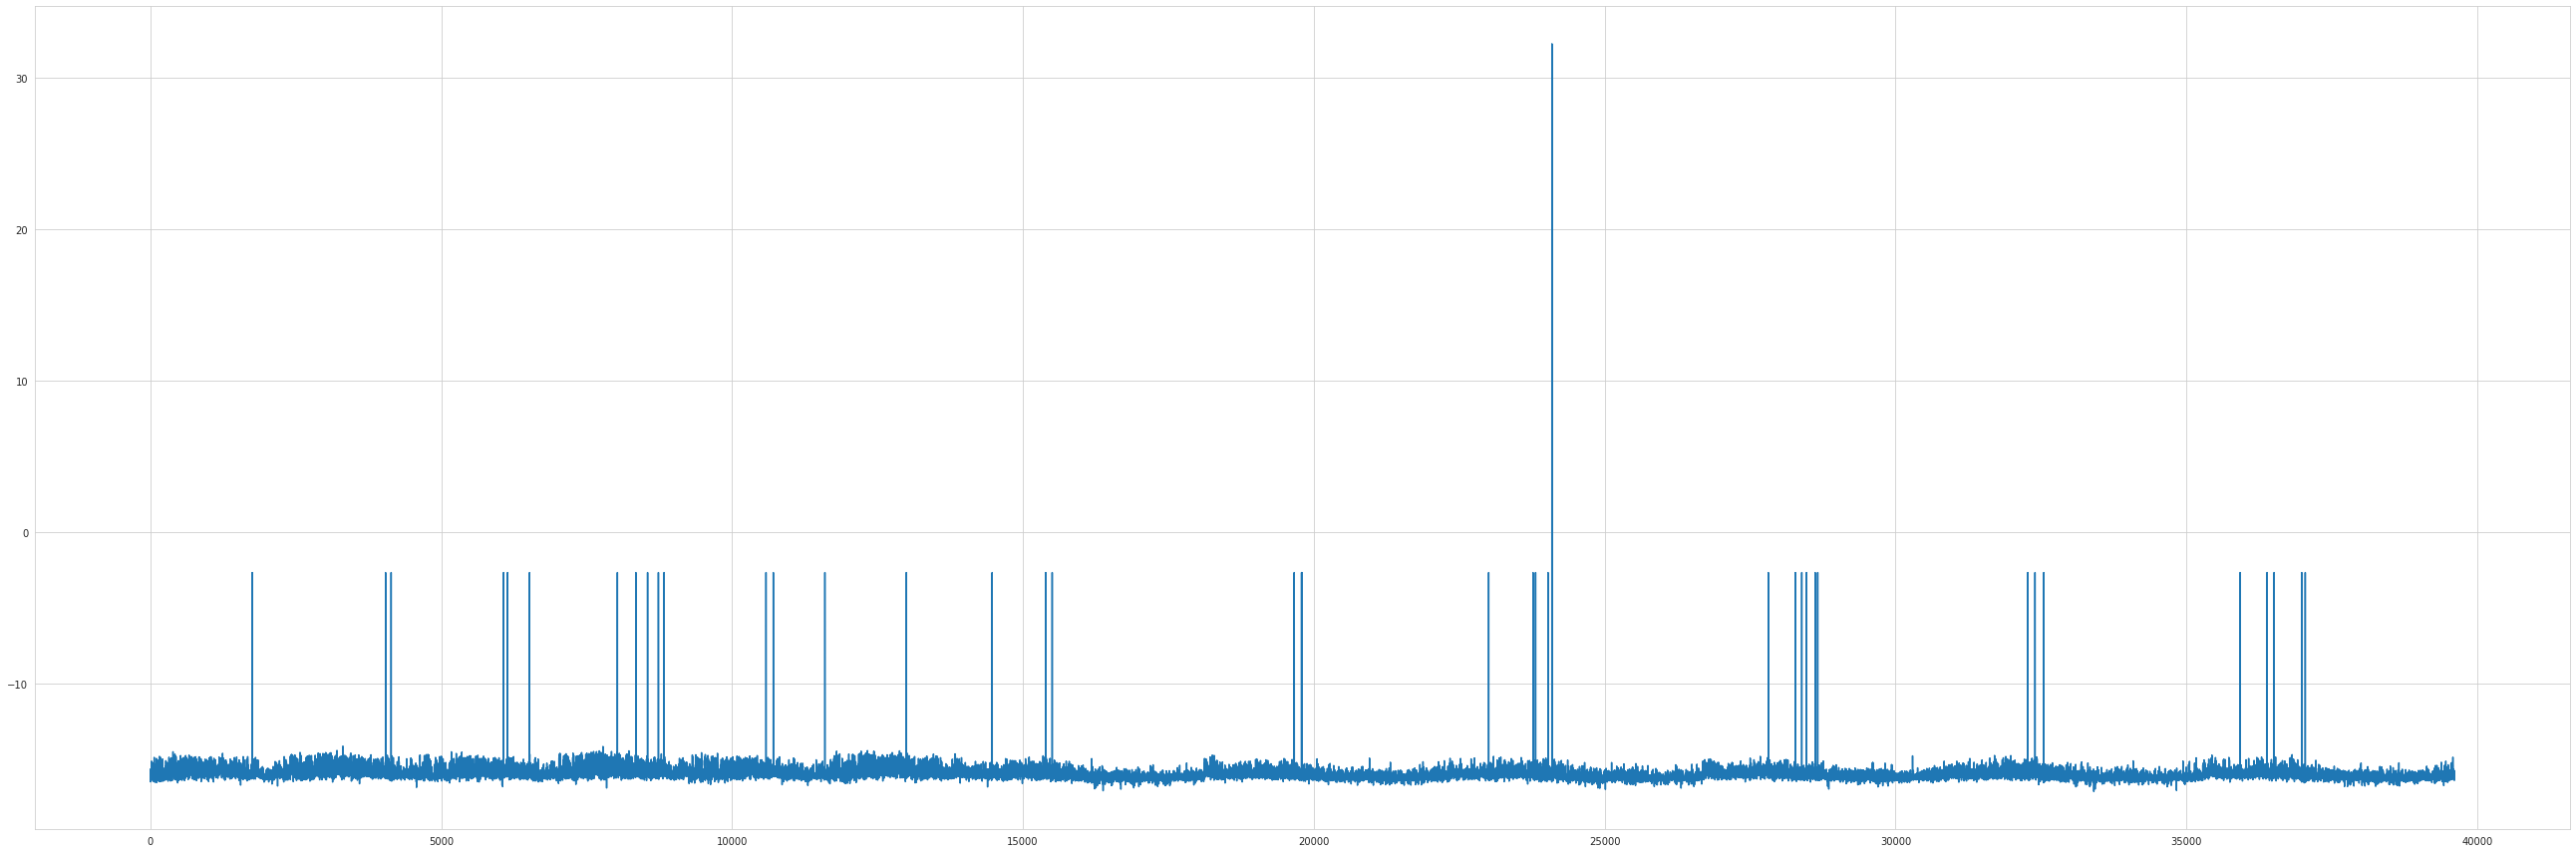

In [35]:
plt.figure(figsize=(36,12))
plt.plot(train_x["X_38"])
plt.tight_layout()

There are many outliers, they will be changed into maximum value, which is less than -10

In [36]:
max(train_x[train_x["X_38"]<-10]["X_38"])

-14.1

In [37]:
for idx in train_x[train_x["X_38"]>-10].index:
    train_x.at[idx, "X_38"] = -14.1

In [38]:
for idx in test_x[test_x["X_38"]>-10].index:
    test_x.at[idx, "X_38"] = -14.1

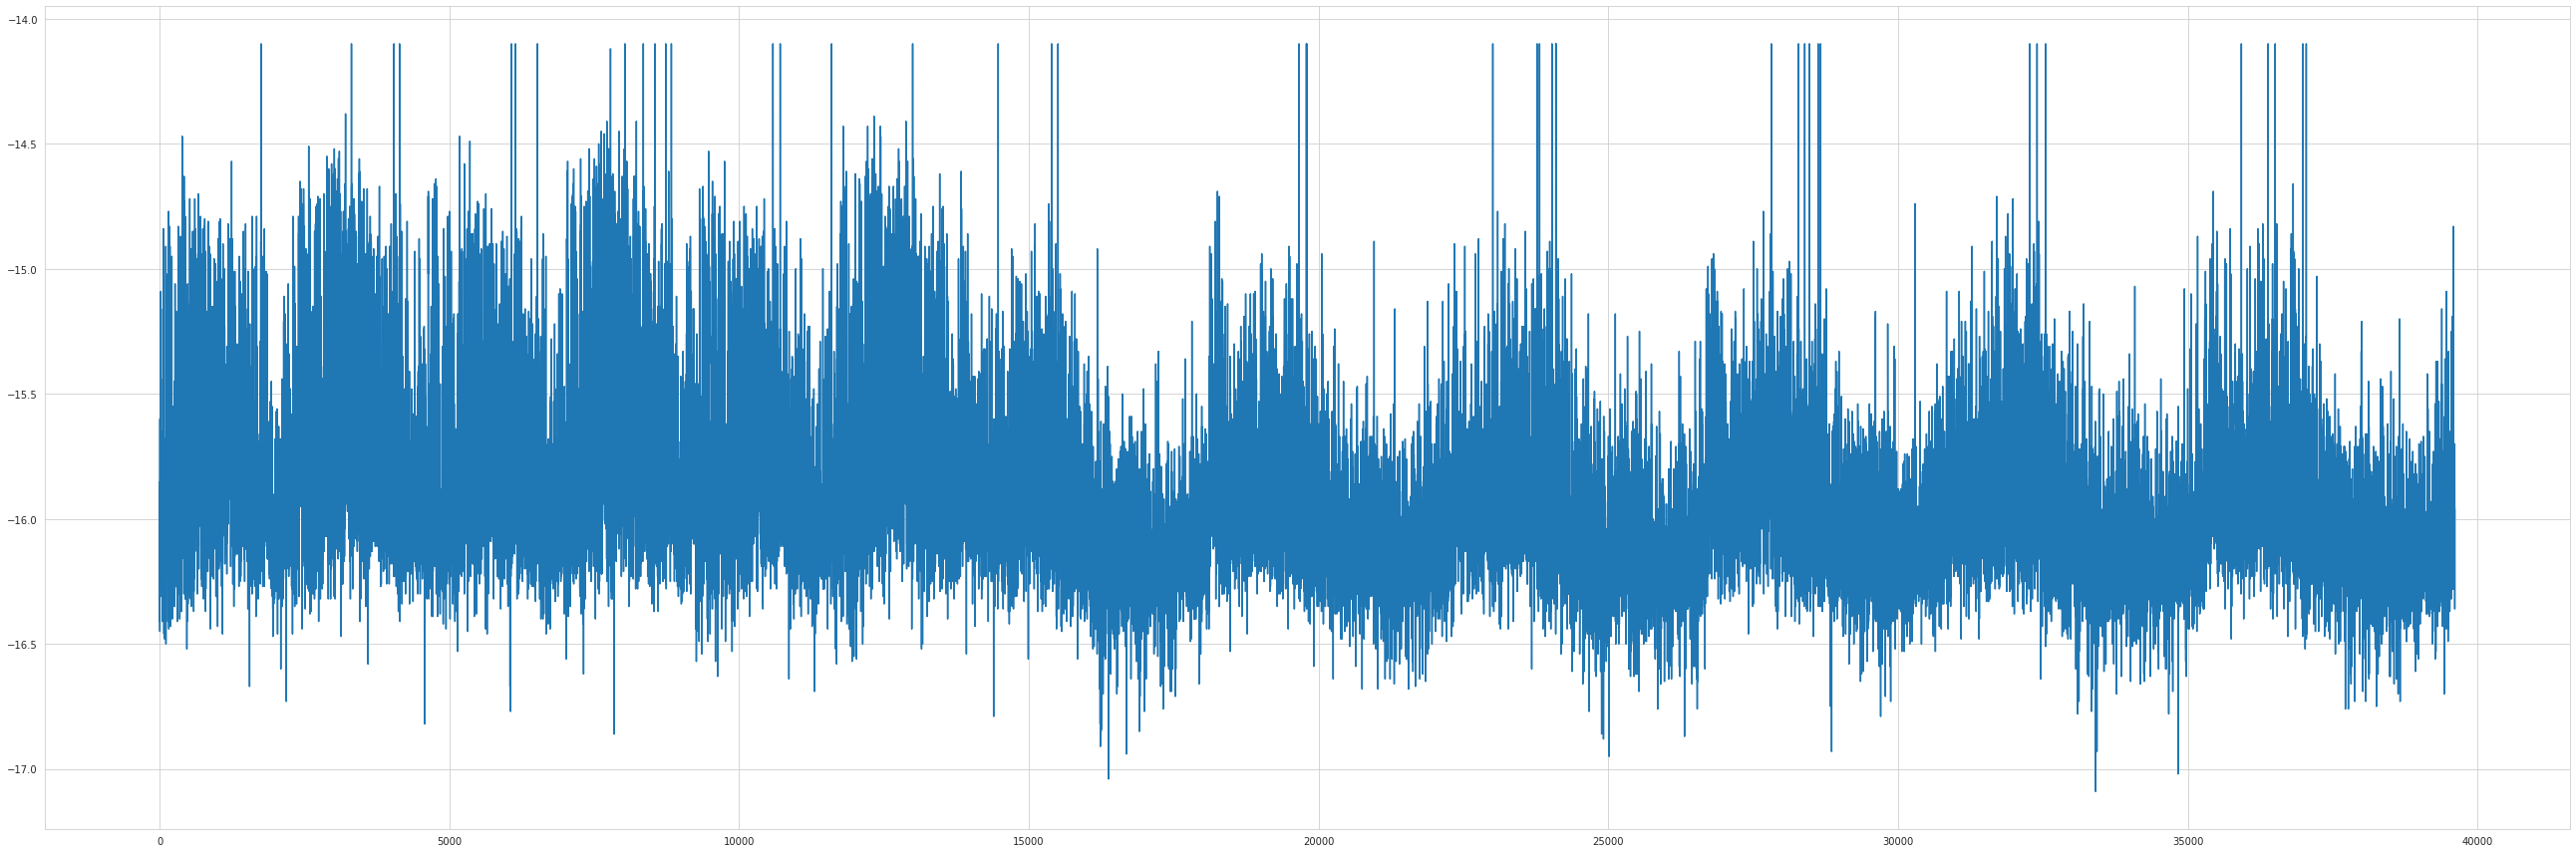

In [39]:
plt.figure(figsize=(36,12))
plt.plot(train_x["X_38"])
plt.tight_layout()

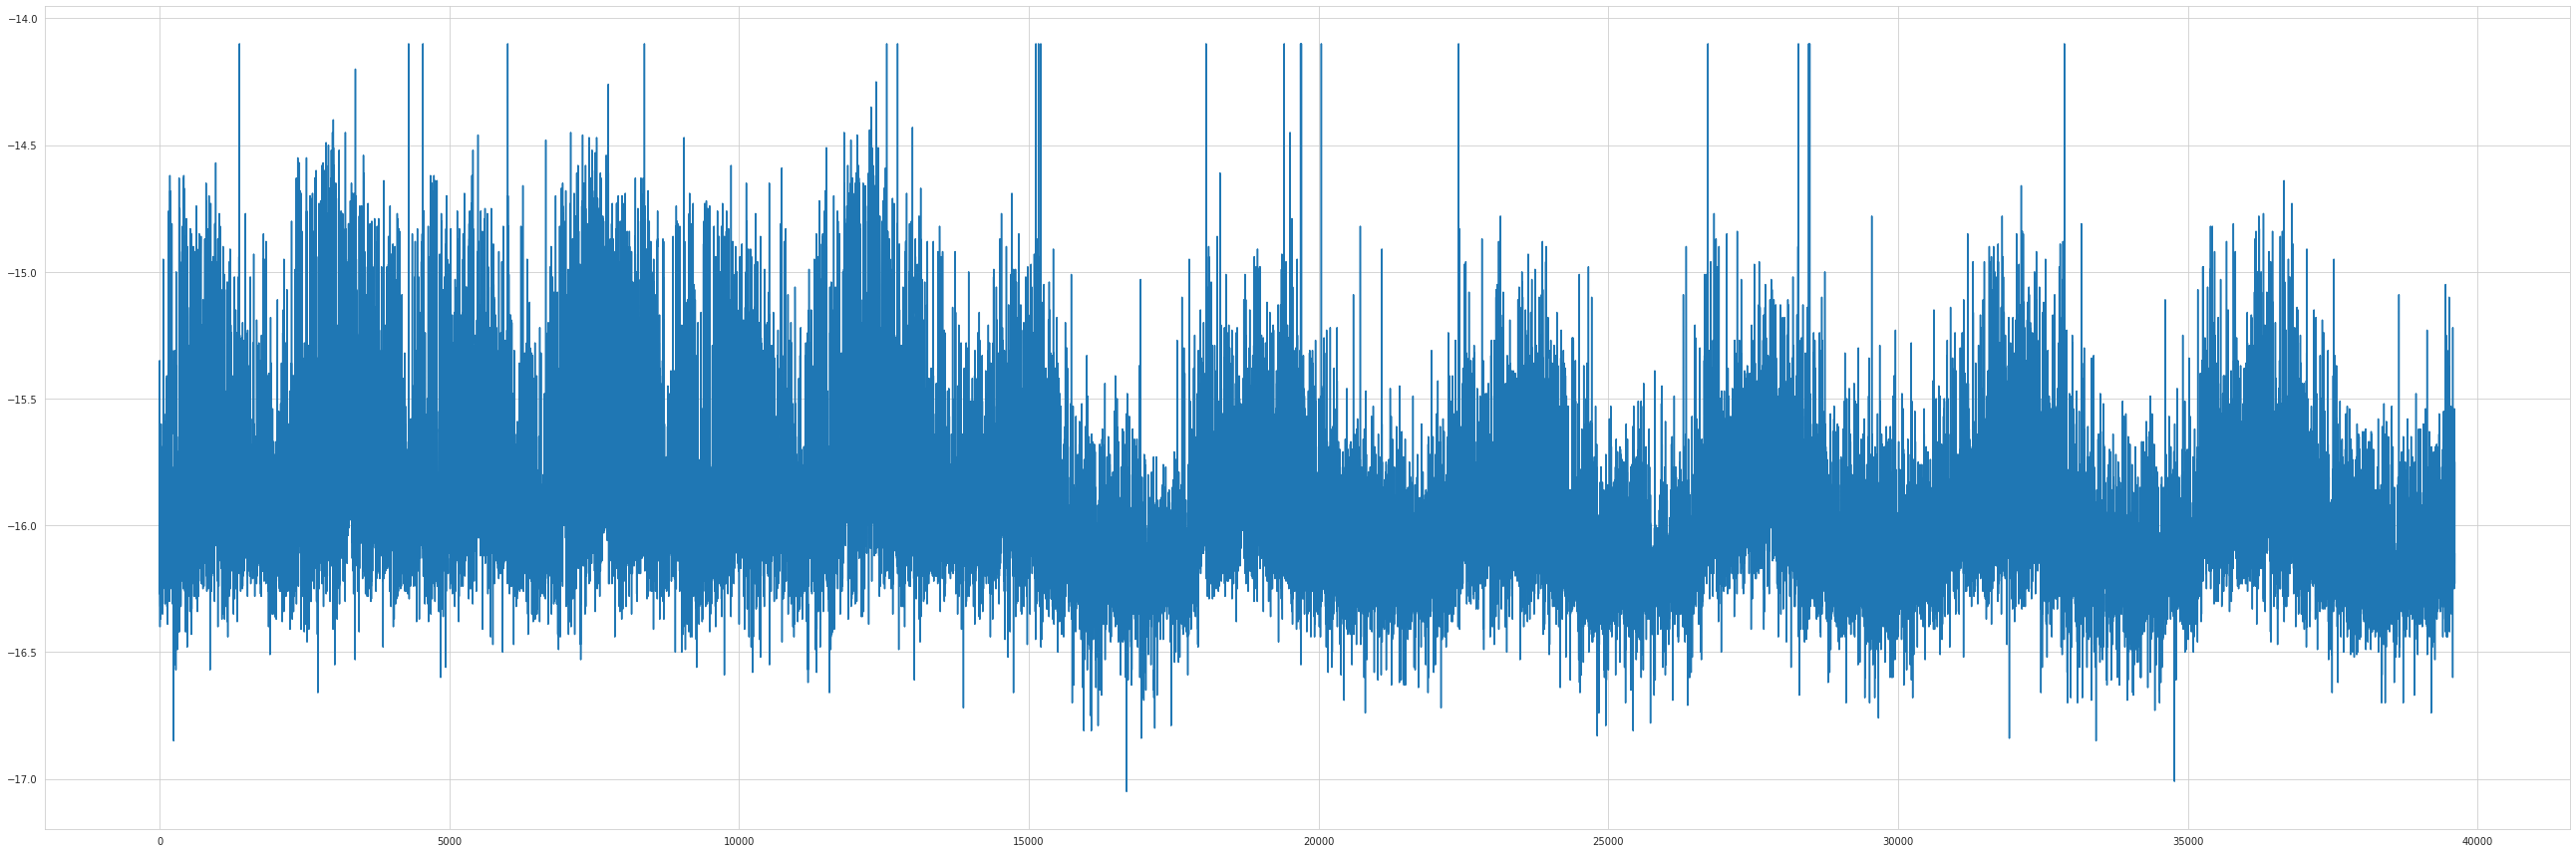

In [40]:
plt.figure(figsize=(36,12))
plt.plot(test_x["X_38"])
plt.tight_layout()

### Dealing with X_39

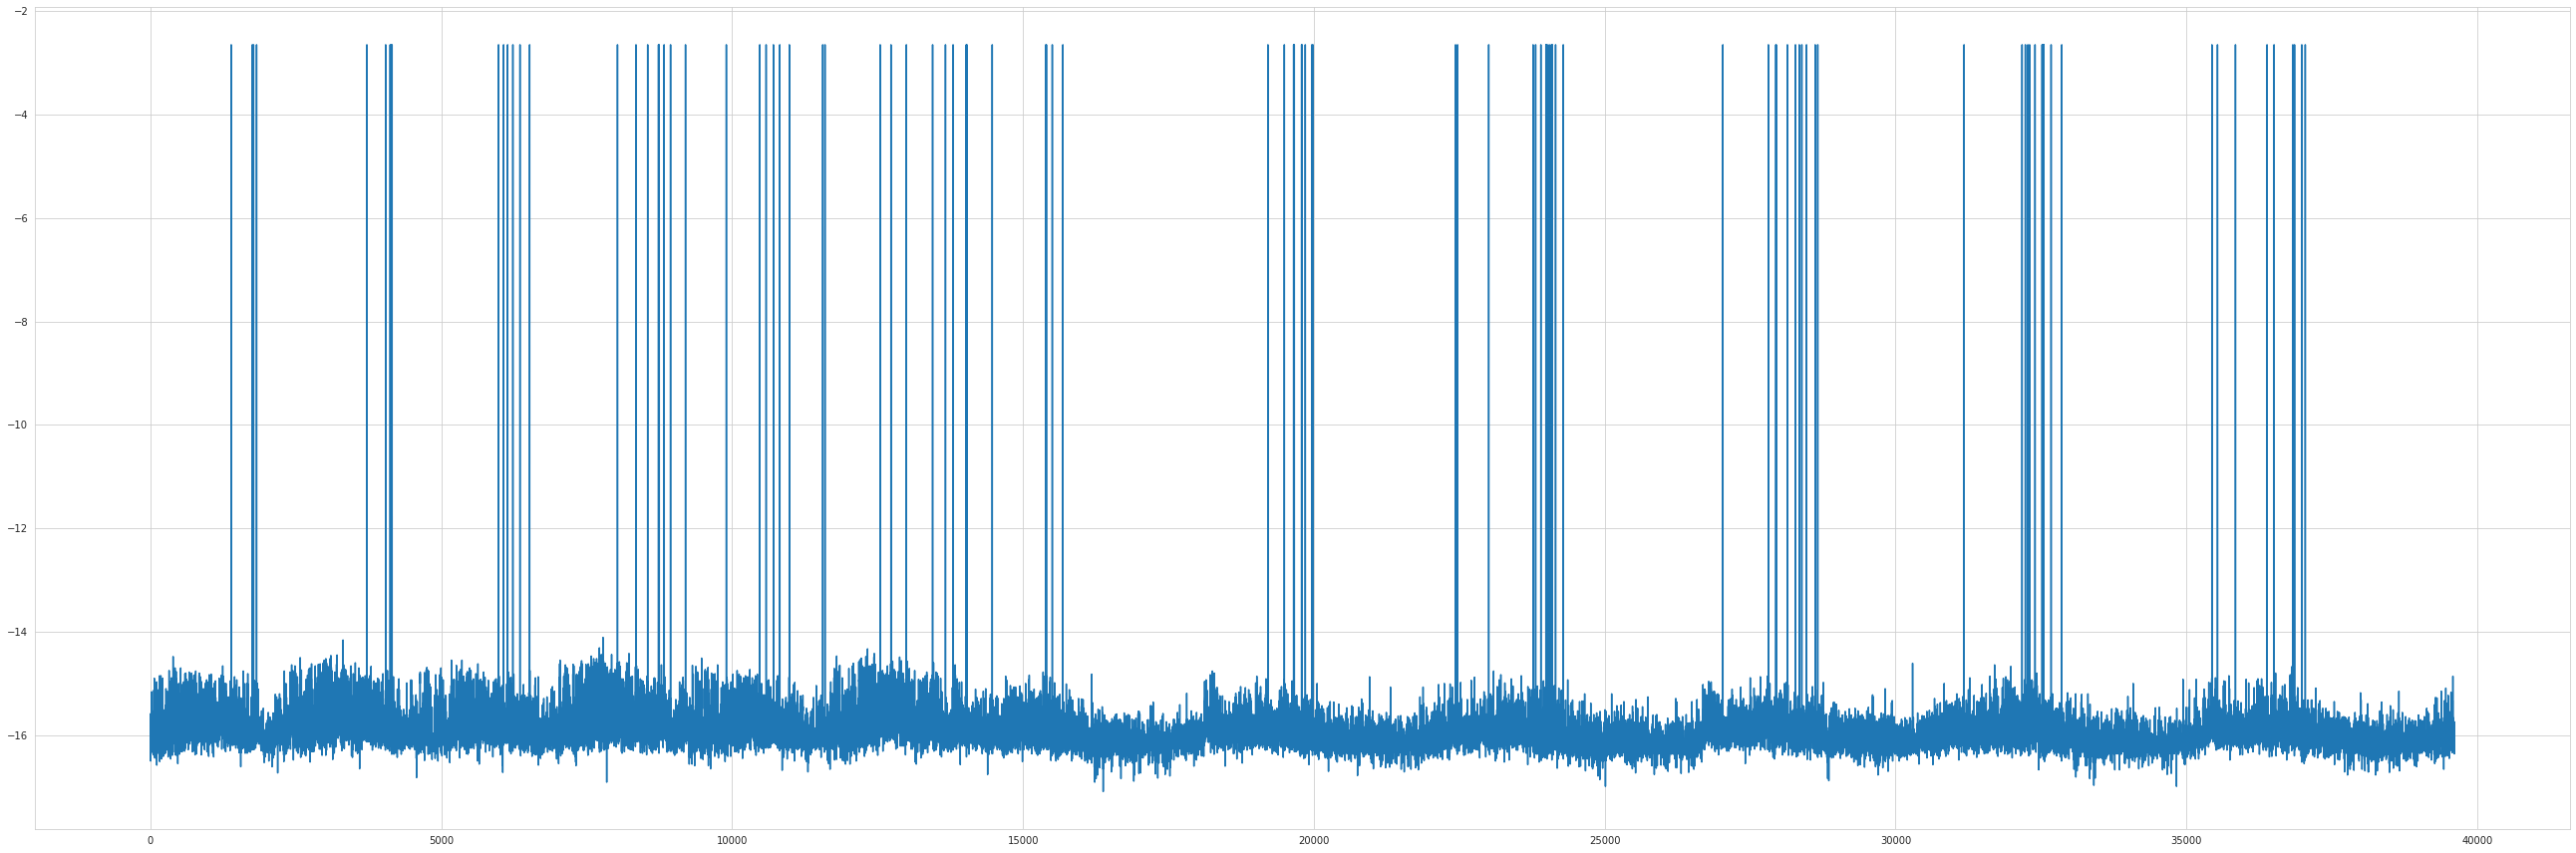

In [41]:
plt.figure(figsize=(36,12))
plt.plot(train_x["X_39"])
plt.tight_layout()

Same method with X_38 was applied to X_39 feature

In [42]:
max(train_x[train_x["X_39"]<-10]["X_39"])

-14.11

In [43]:
for idx in train_x[train_x["X_39"]>-10].index:
    train_x.at[idx, "X_39"] = -14.11

In [44]:
for idx in test_x[test_x["X_39"]>-10].index:
    test_x.at[idx, "X_39"] = -14.11

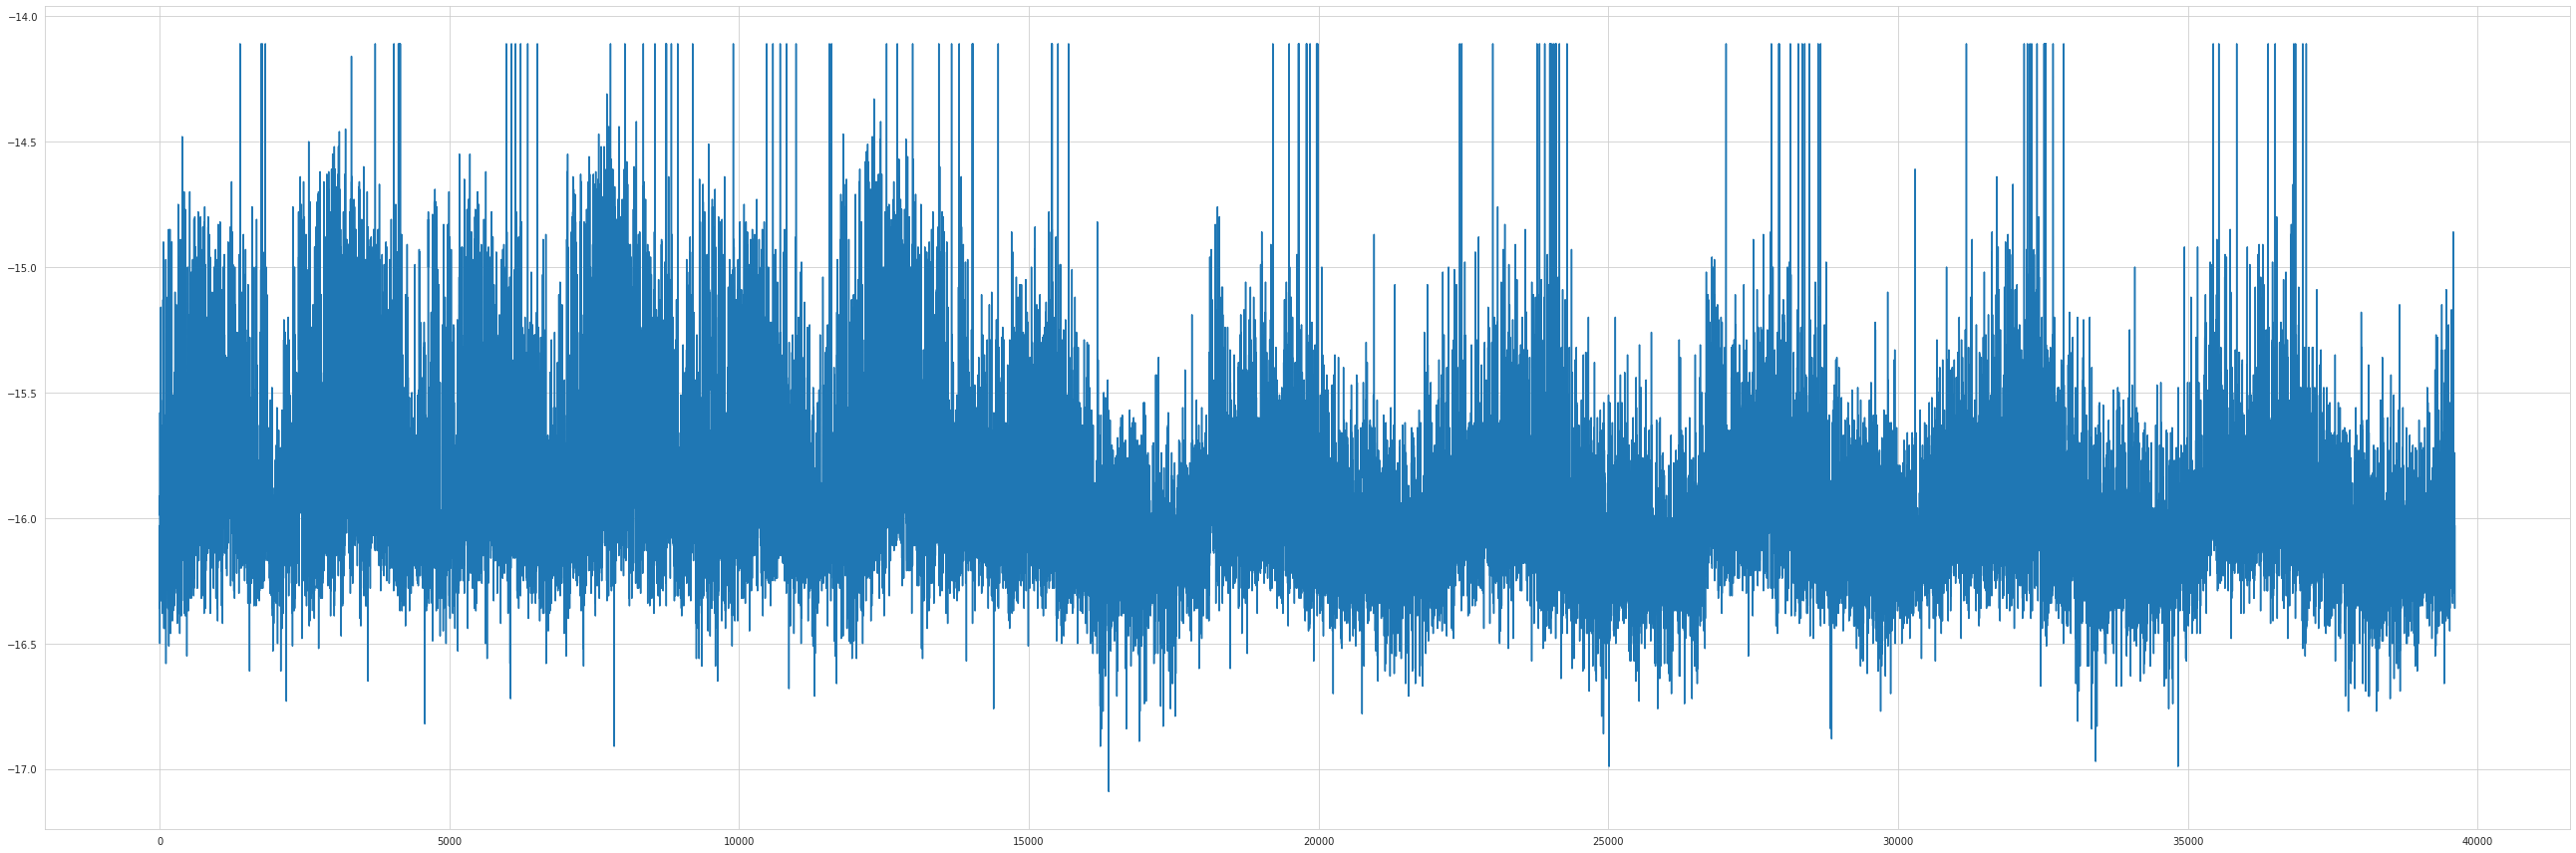

In [45]:
plt.figure(figsize=(36,12))
plt.plot(train_x["X_39"])
plt.tight_layout()

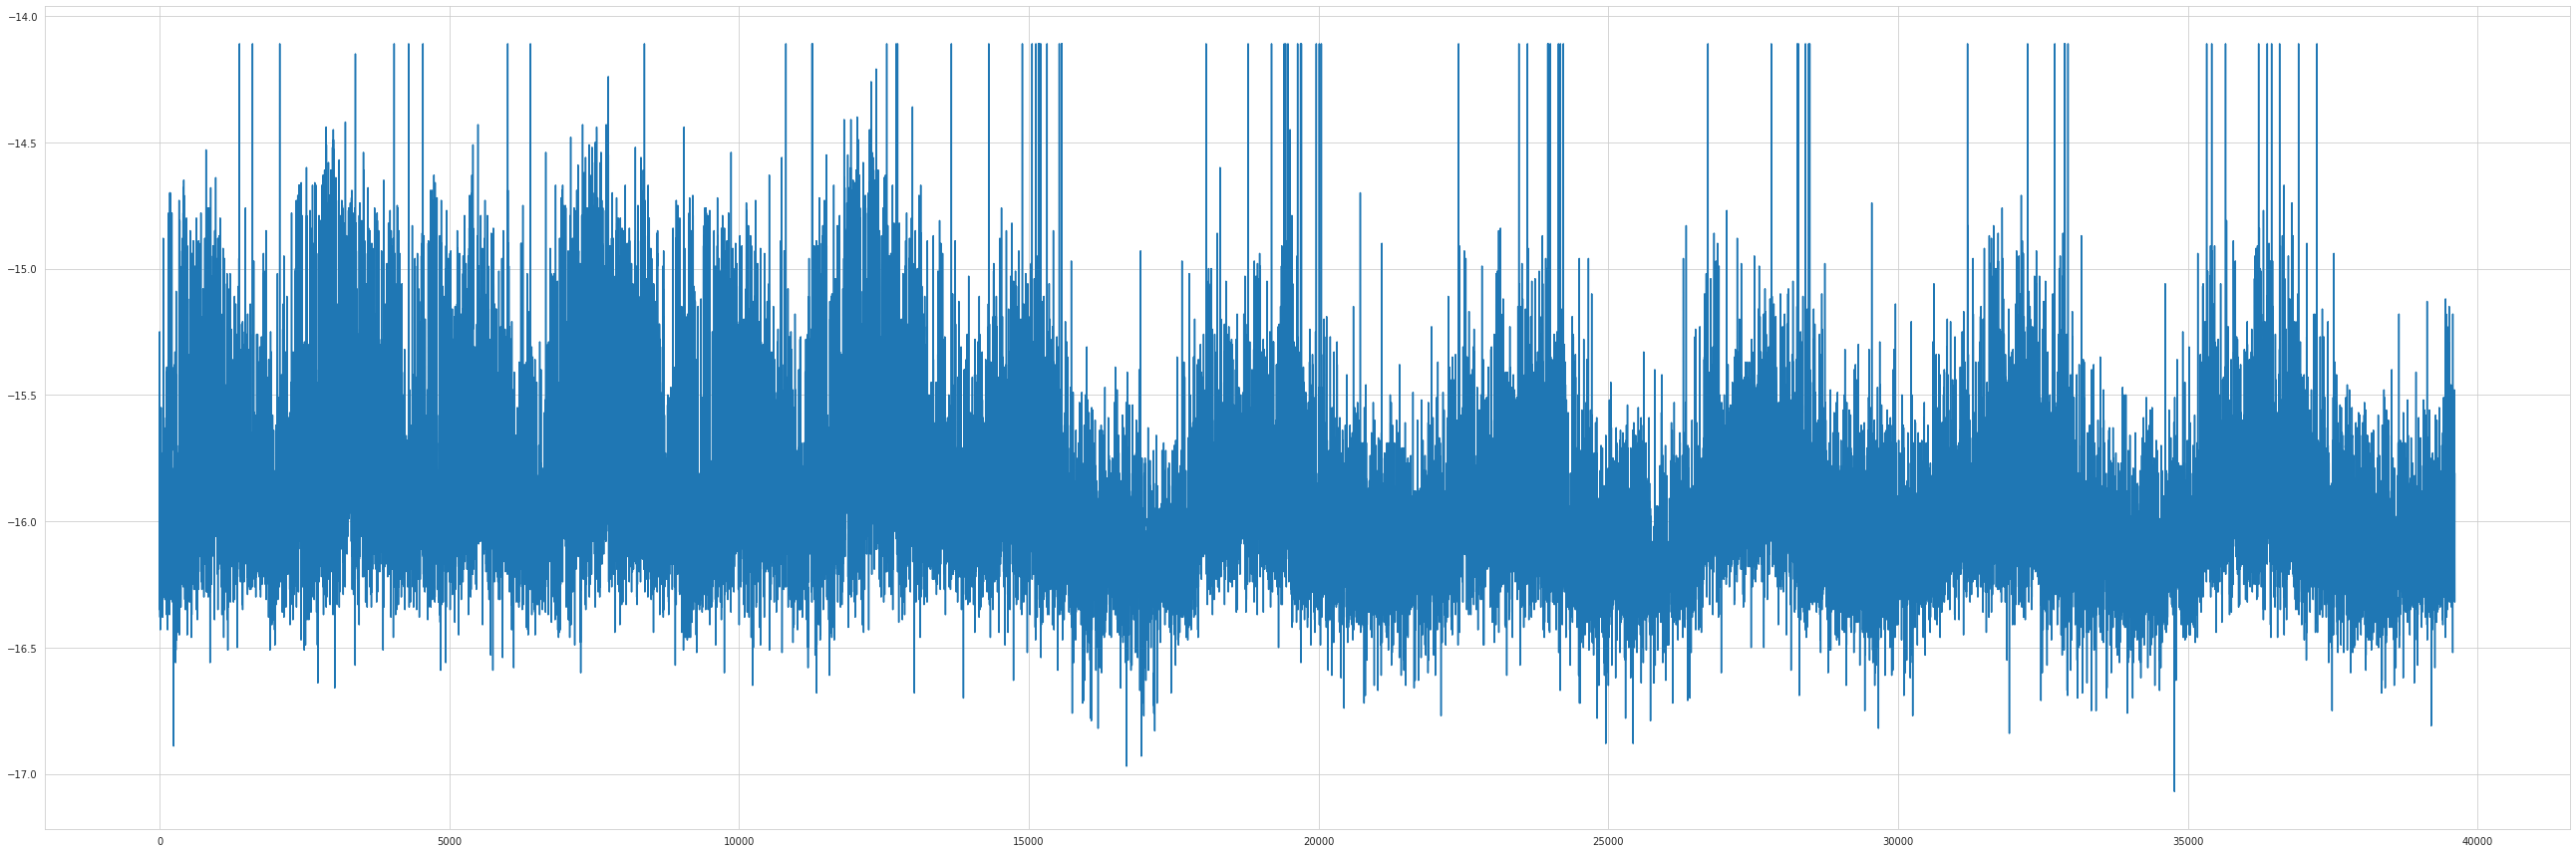

In [46]:
plt.figure(figsize=(36,12))
plt.plot(test_x["X_39"])
plt.tight_layout()

### Dealing with X_07

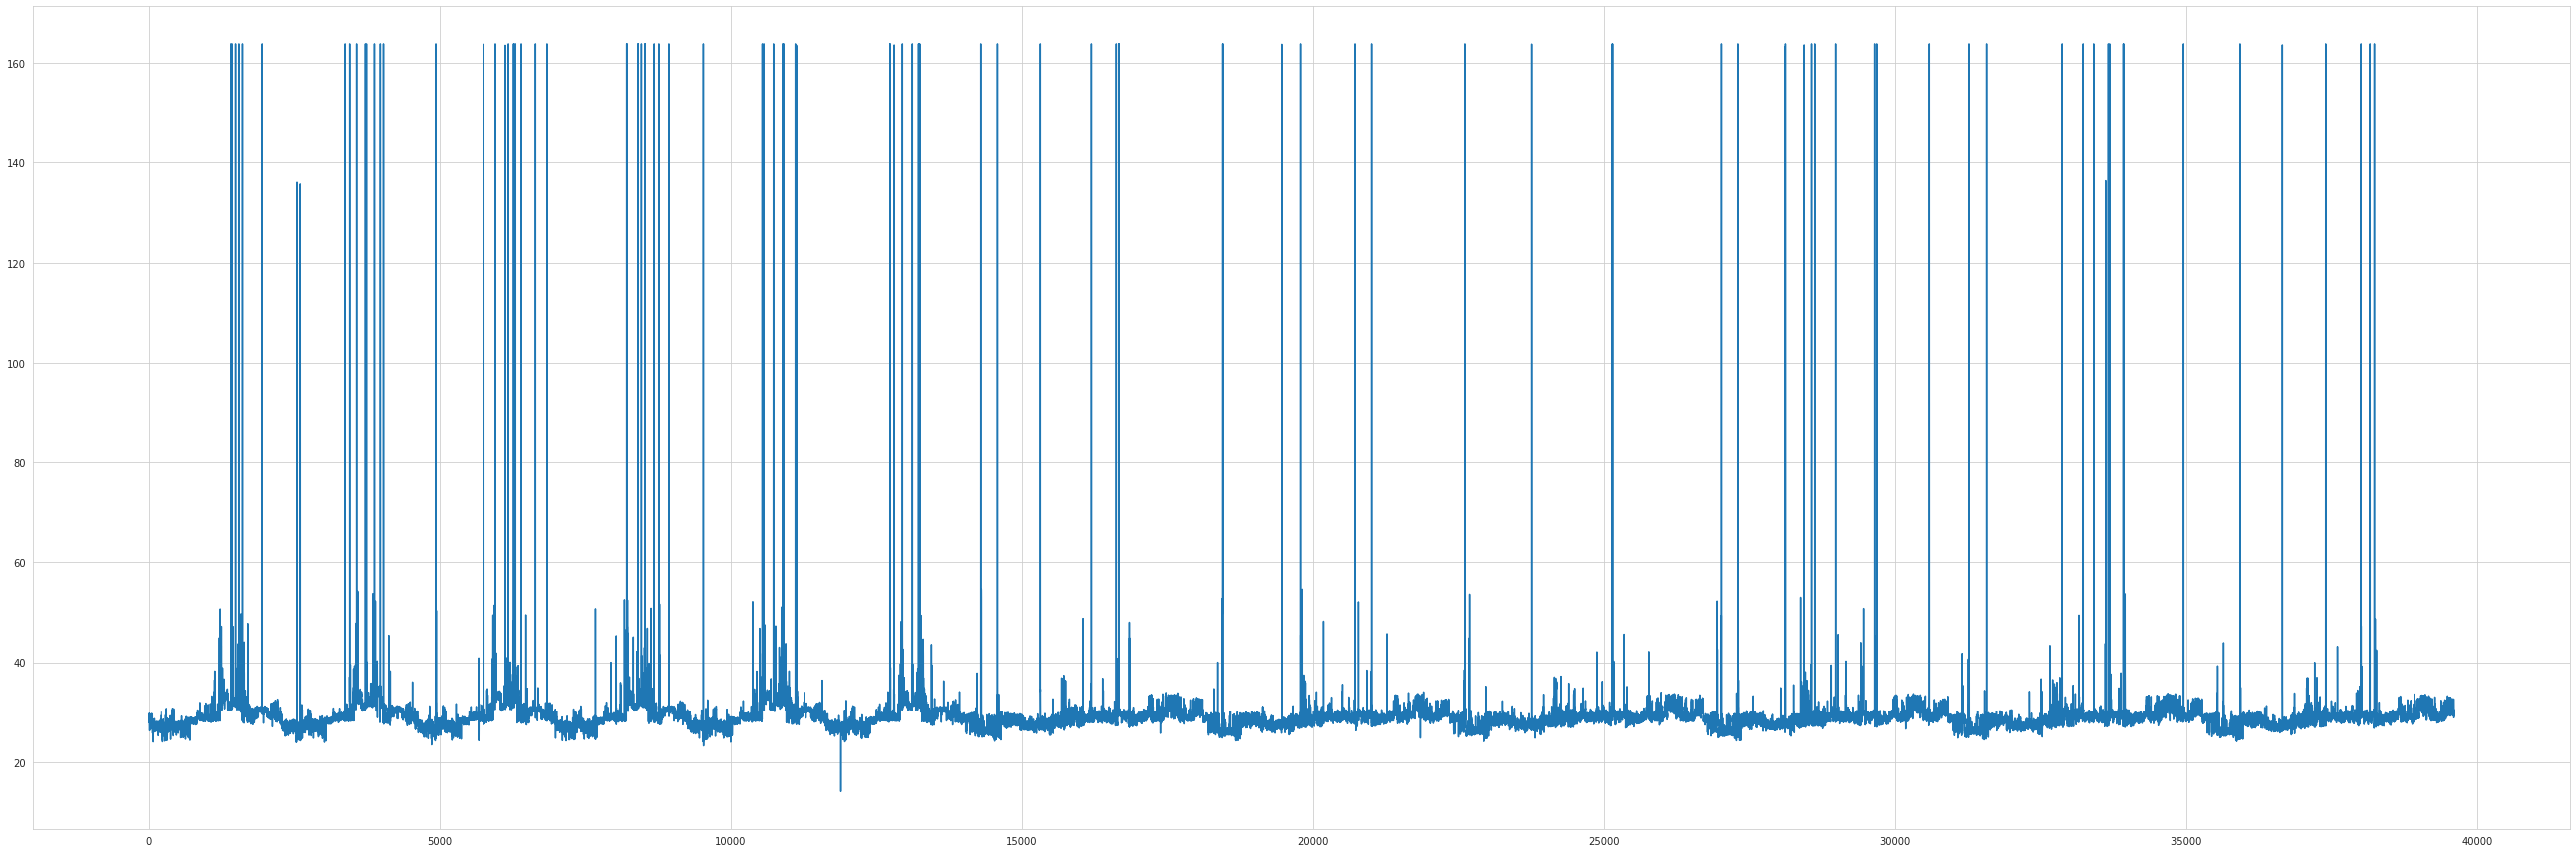

In [47]:
plt.figure(figsize=(36,12))
plt.plot(train_x["X_07"])
plt.tight_layout()

In [53]:
max(train_x[train_x["X_07"]<60]["X_07"])

54.63

In [54]:
for idx in train_x[train_x["X_07"]>60].index:
    train_x.at[idx, "X_07"] = 54.63
    
for idx in test_x[test_x["X_07"]>60].index:
    test_x.at[idx, "X_07"] = 54.63

In [55]:
min(train_x[train_x["X_07"]>20]["X_07"])

23.25

In [56]:
for idx in train_x[train_x["X_07"]<20].index:
    train_x.at[idx, "X_07"] = 23.25
    
for idx in test_x[test_x["X_07"]<20].index:
    test_x.at[idx, "X_07"] = 23.25

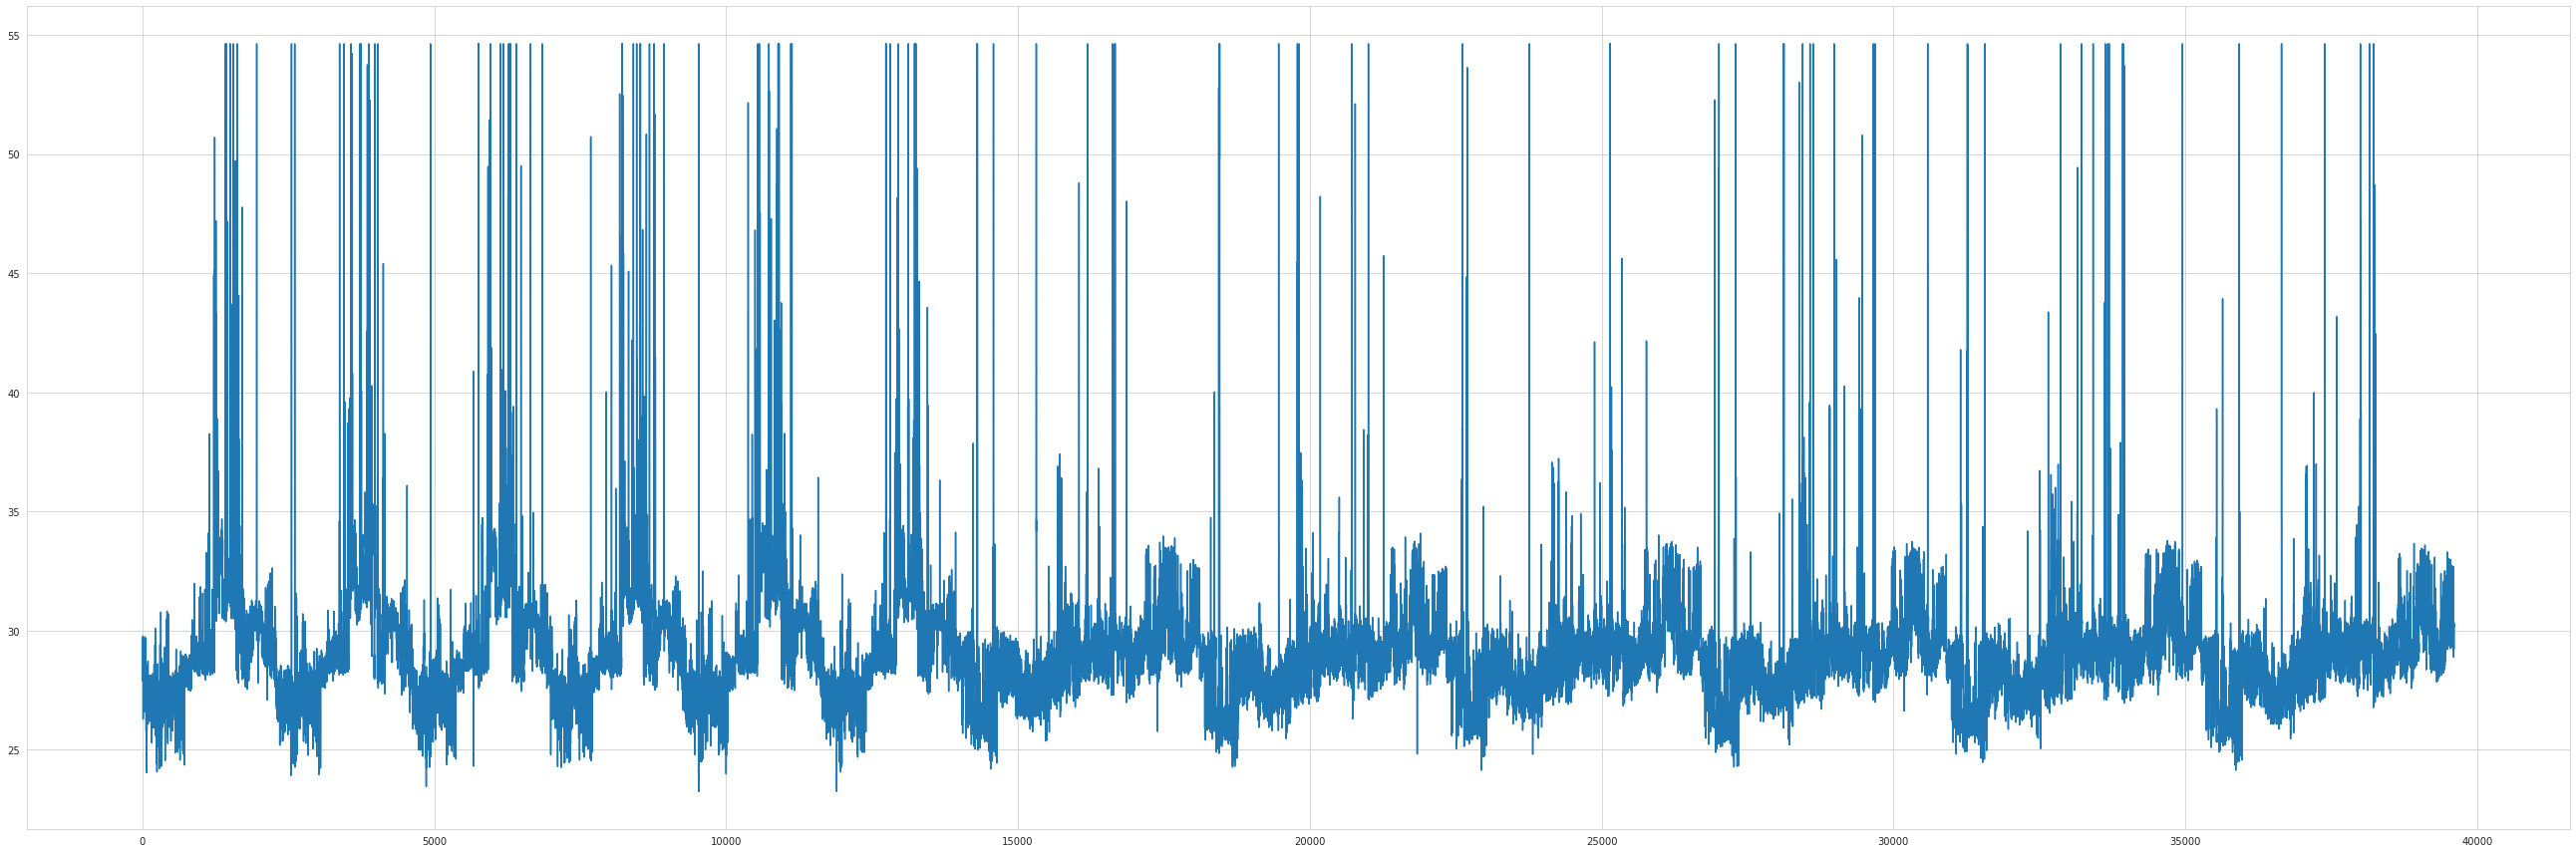

In [57]:
plt.figure(figsize=(36,12))
plt.plot(train_x["X_07"])
plt.tight_layout()

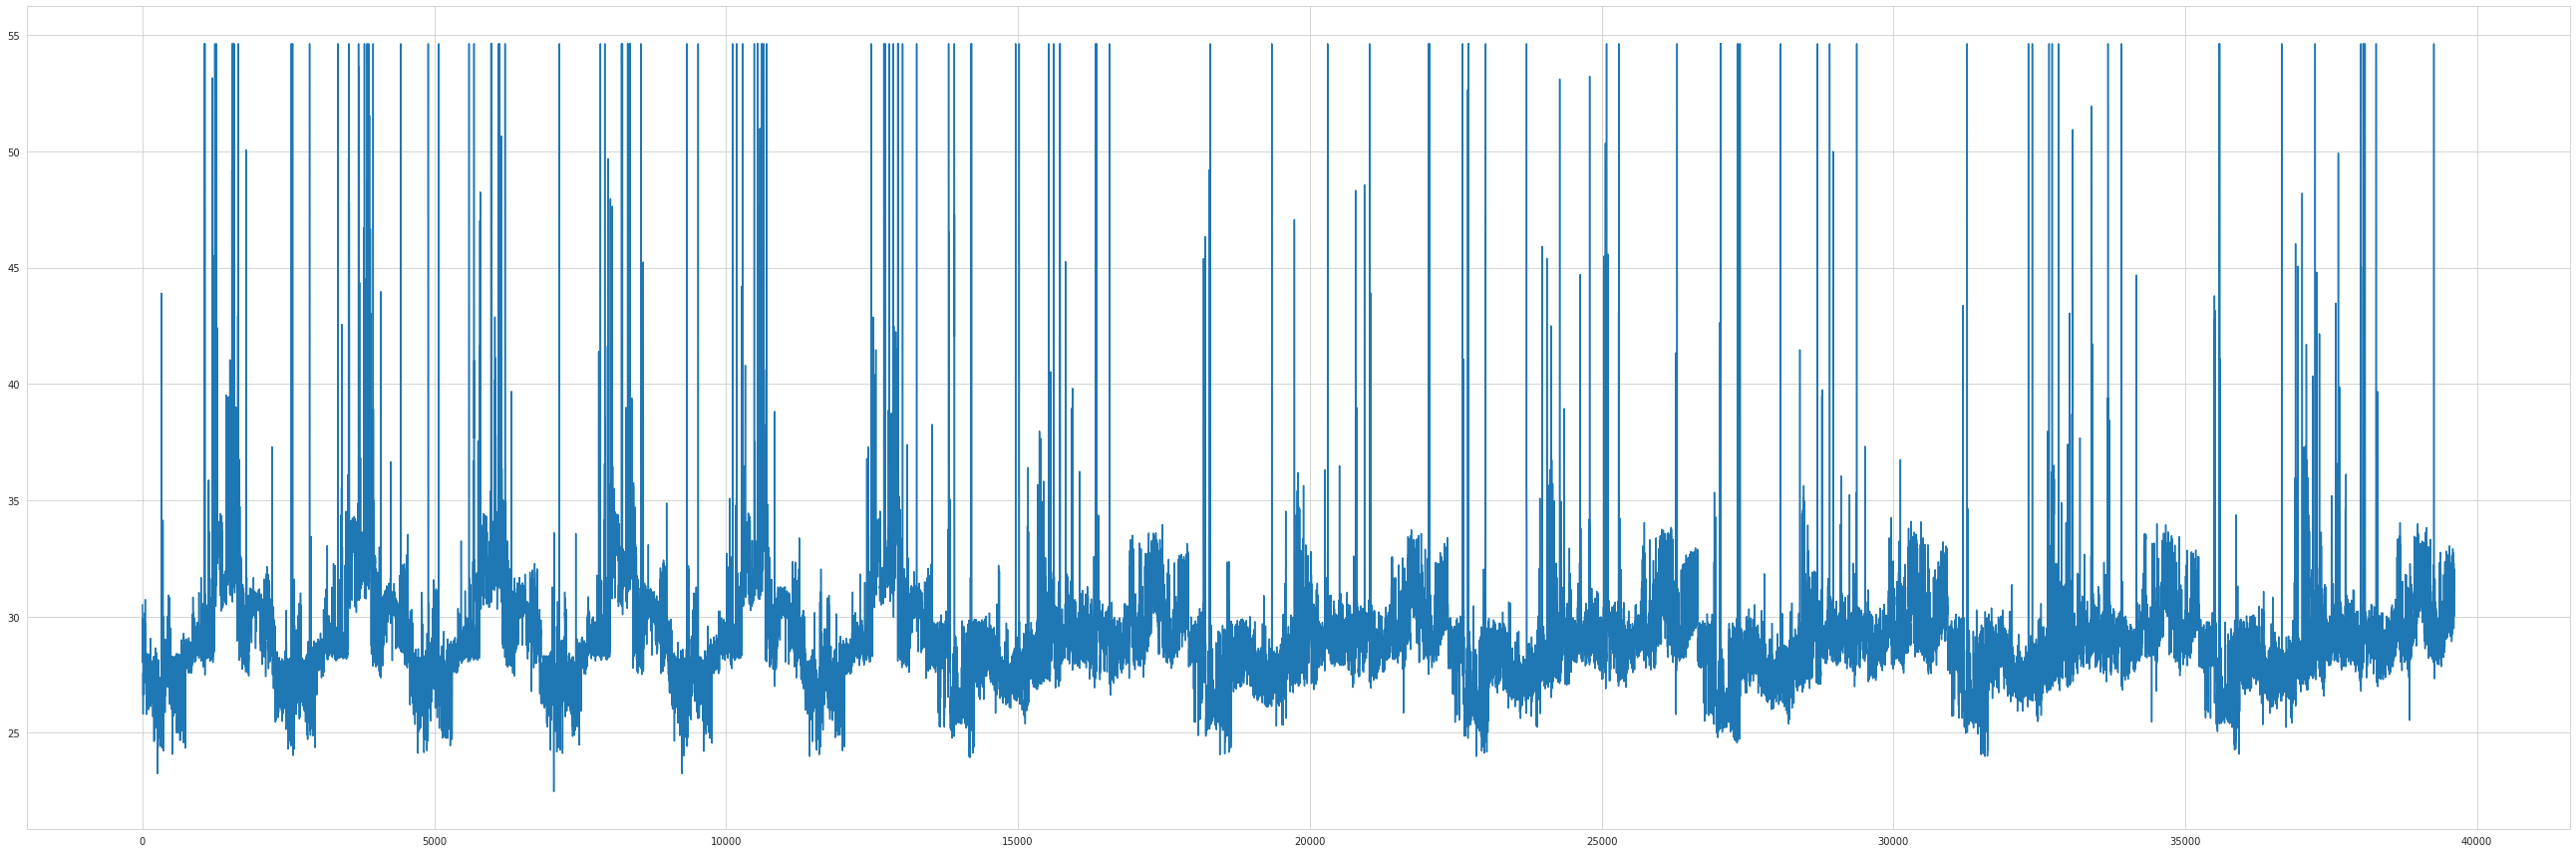

In [58]:
plt.figure(figsize=(36,12))
plt.plot(test_x["X_07"])
plt.tight_layout()

#### Dealing with X_08

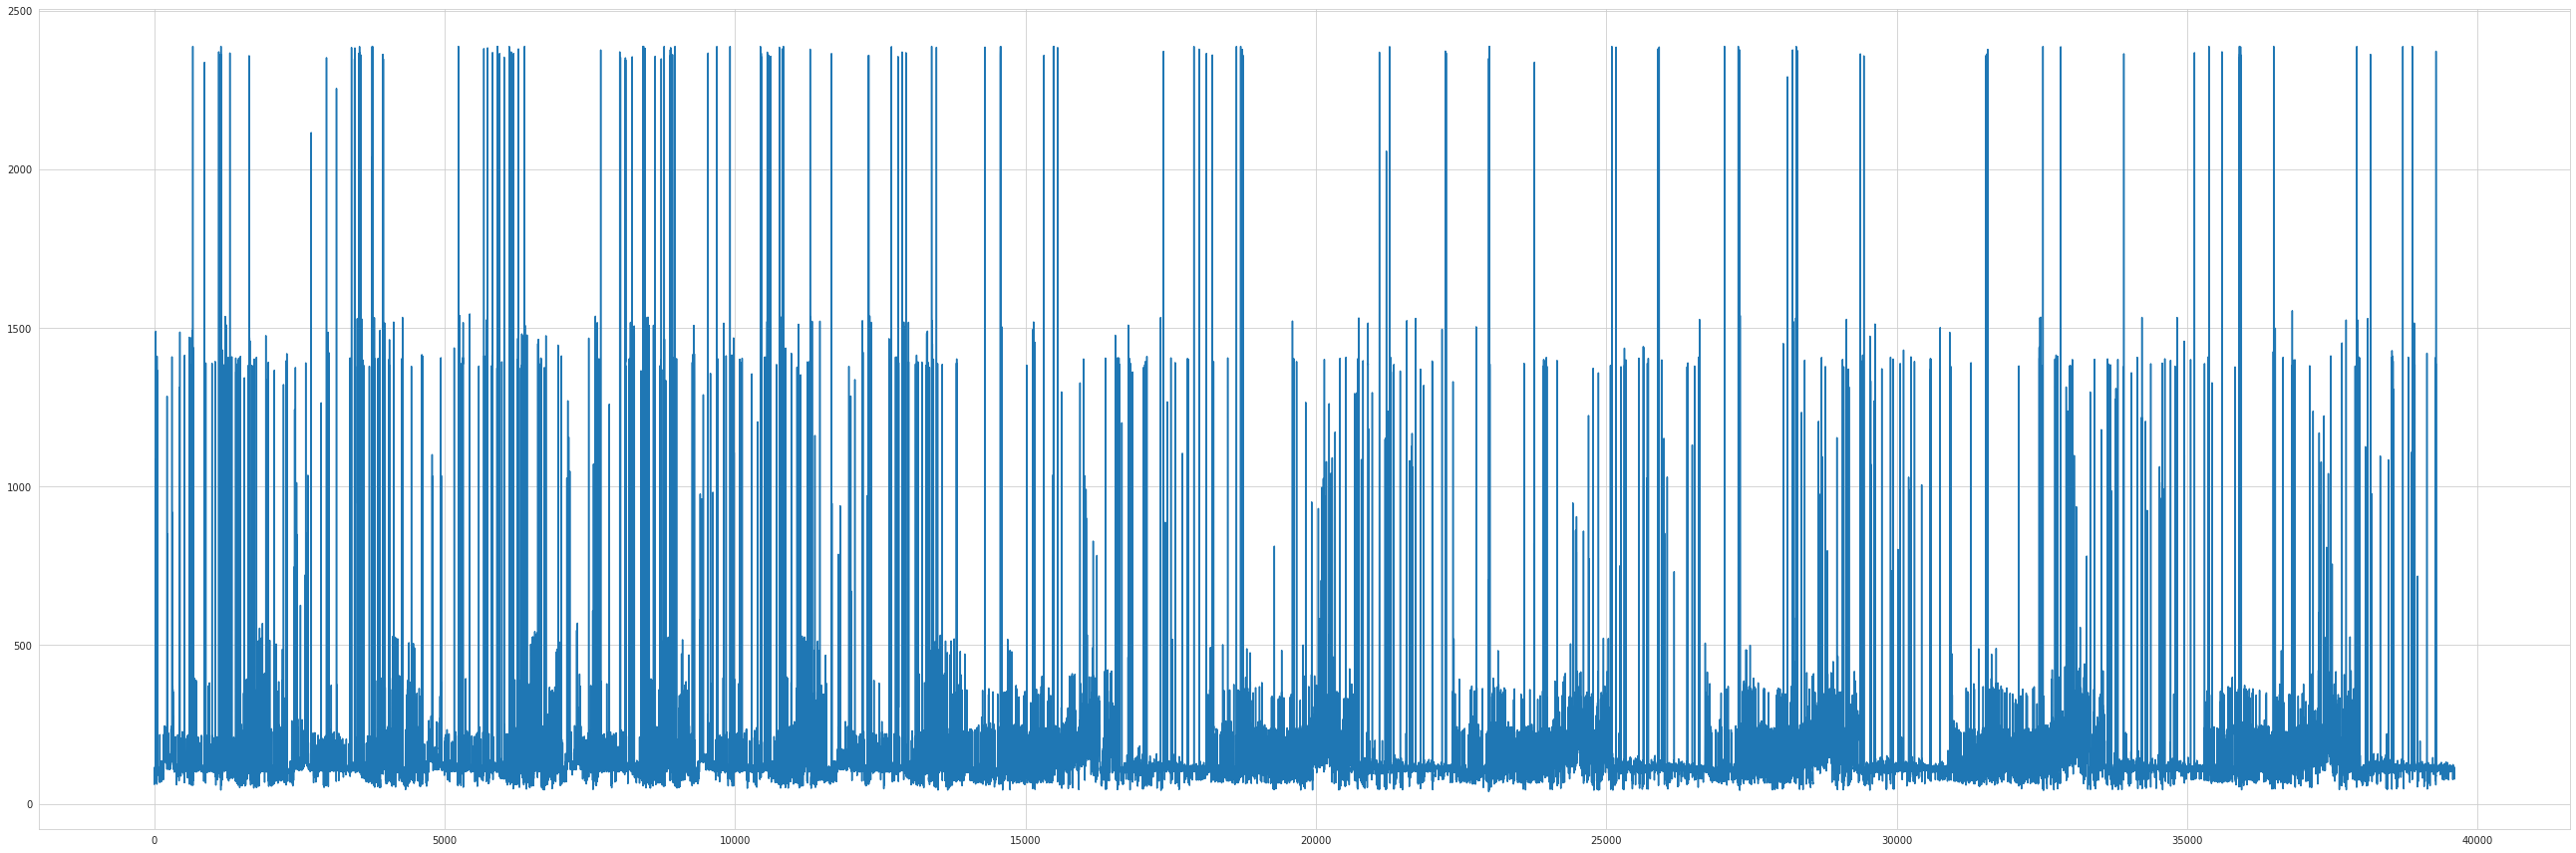

In [59]:
plt.figure(figsize=(36,12))
plt.plot(train_x["X_08"])
plt.tight_layout()

In [60]:
max(train_x[train_x["X_08"]<600]["X_08"])

586.76

In [61]:
for idx in train_x[train_x["X_08"]>600].index:
    train_x.at[idx, "X_08"] = 586.76
    
for idx in test_x[test_x["X_08"]>600].index:
    test_x.at[idx, "X_08"] = 586.76

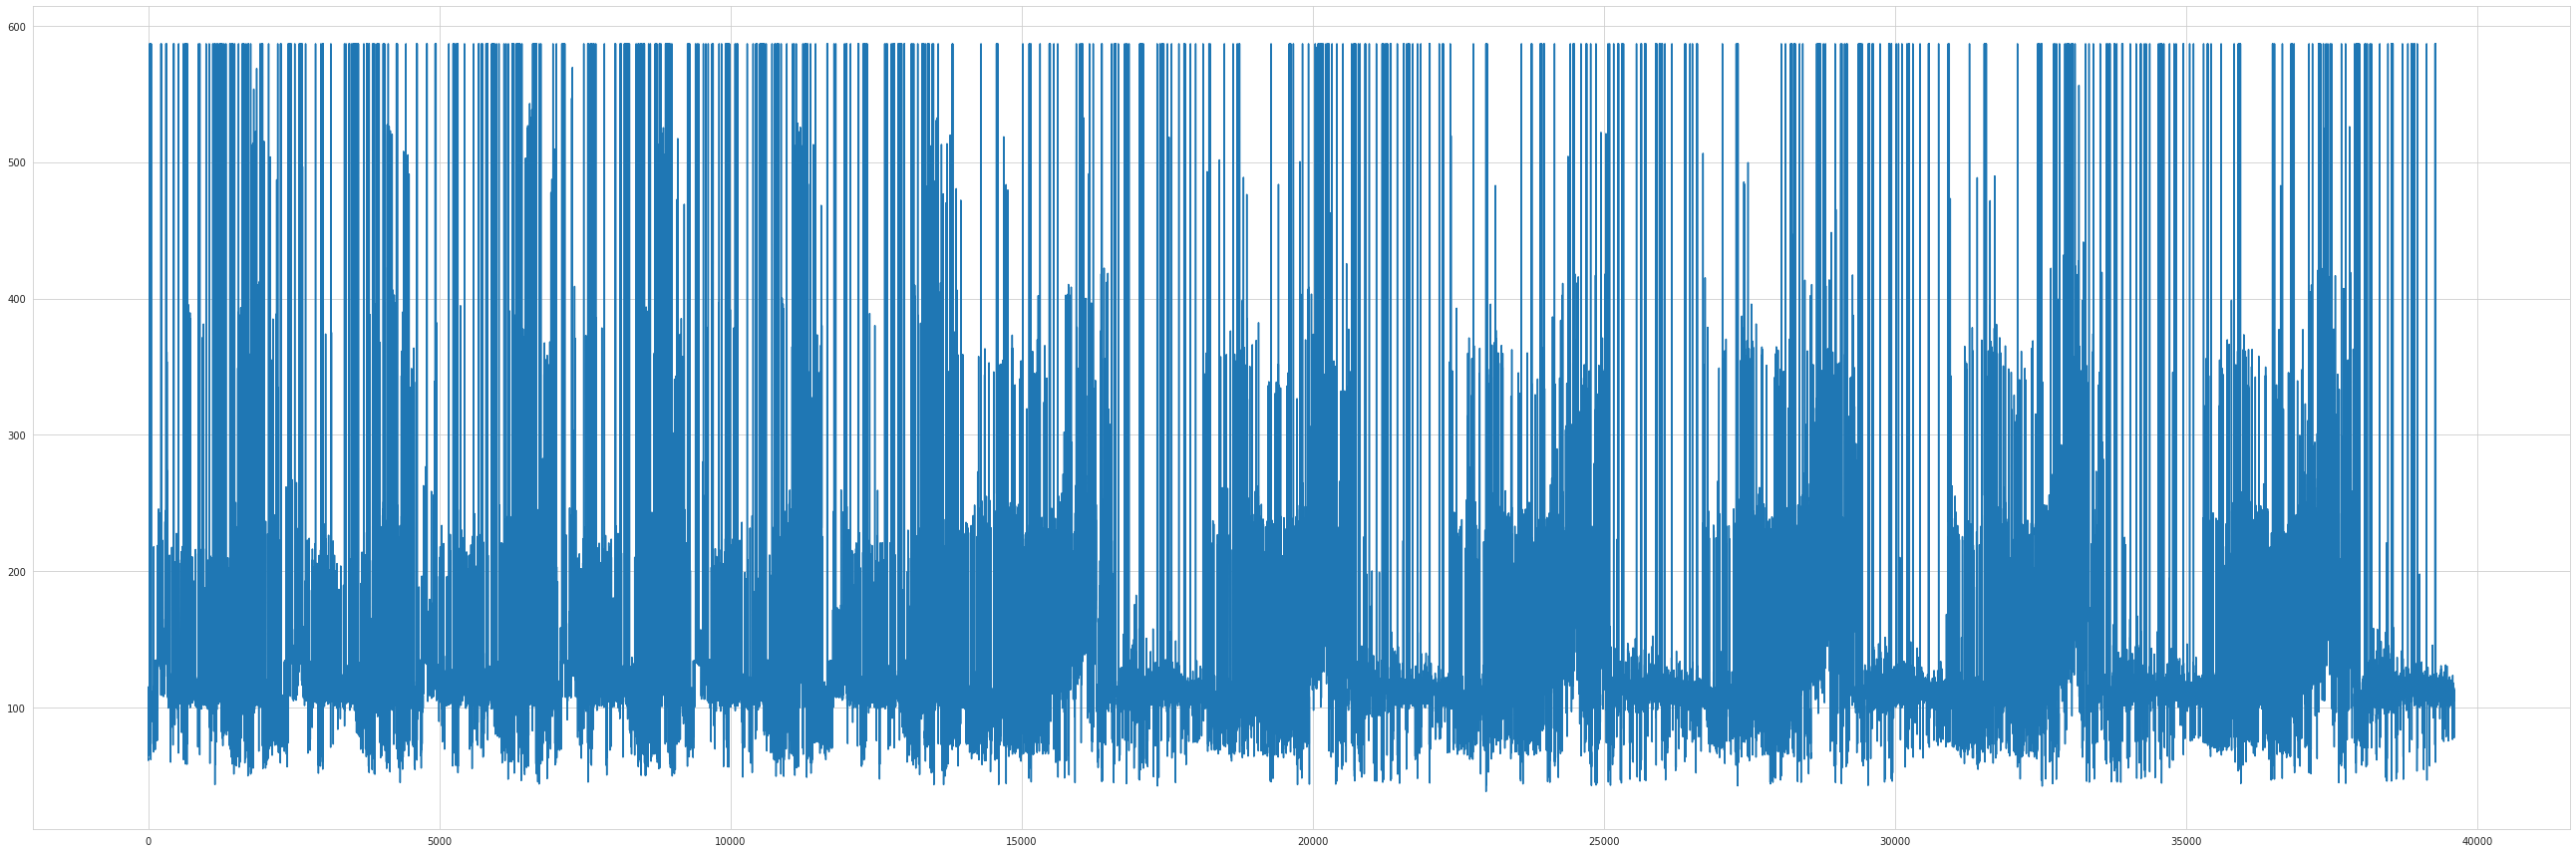

In [62]:
plt.figure(figsize=(36,12))
plt.plot(train_x["X_08"])
plt.tight_layout()

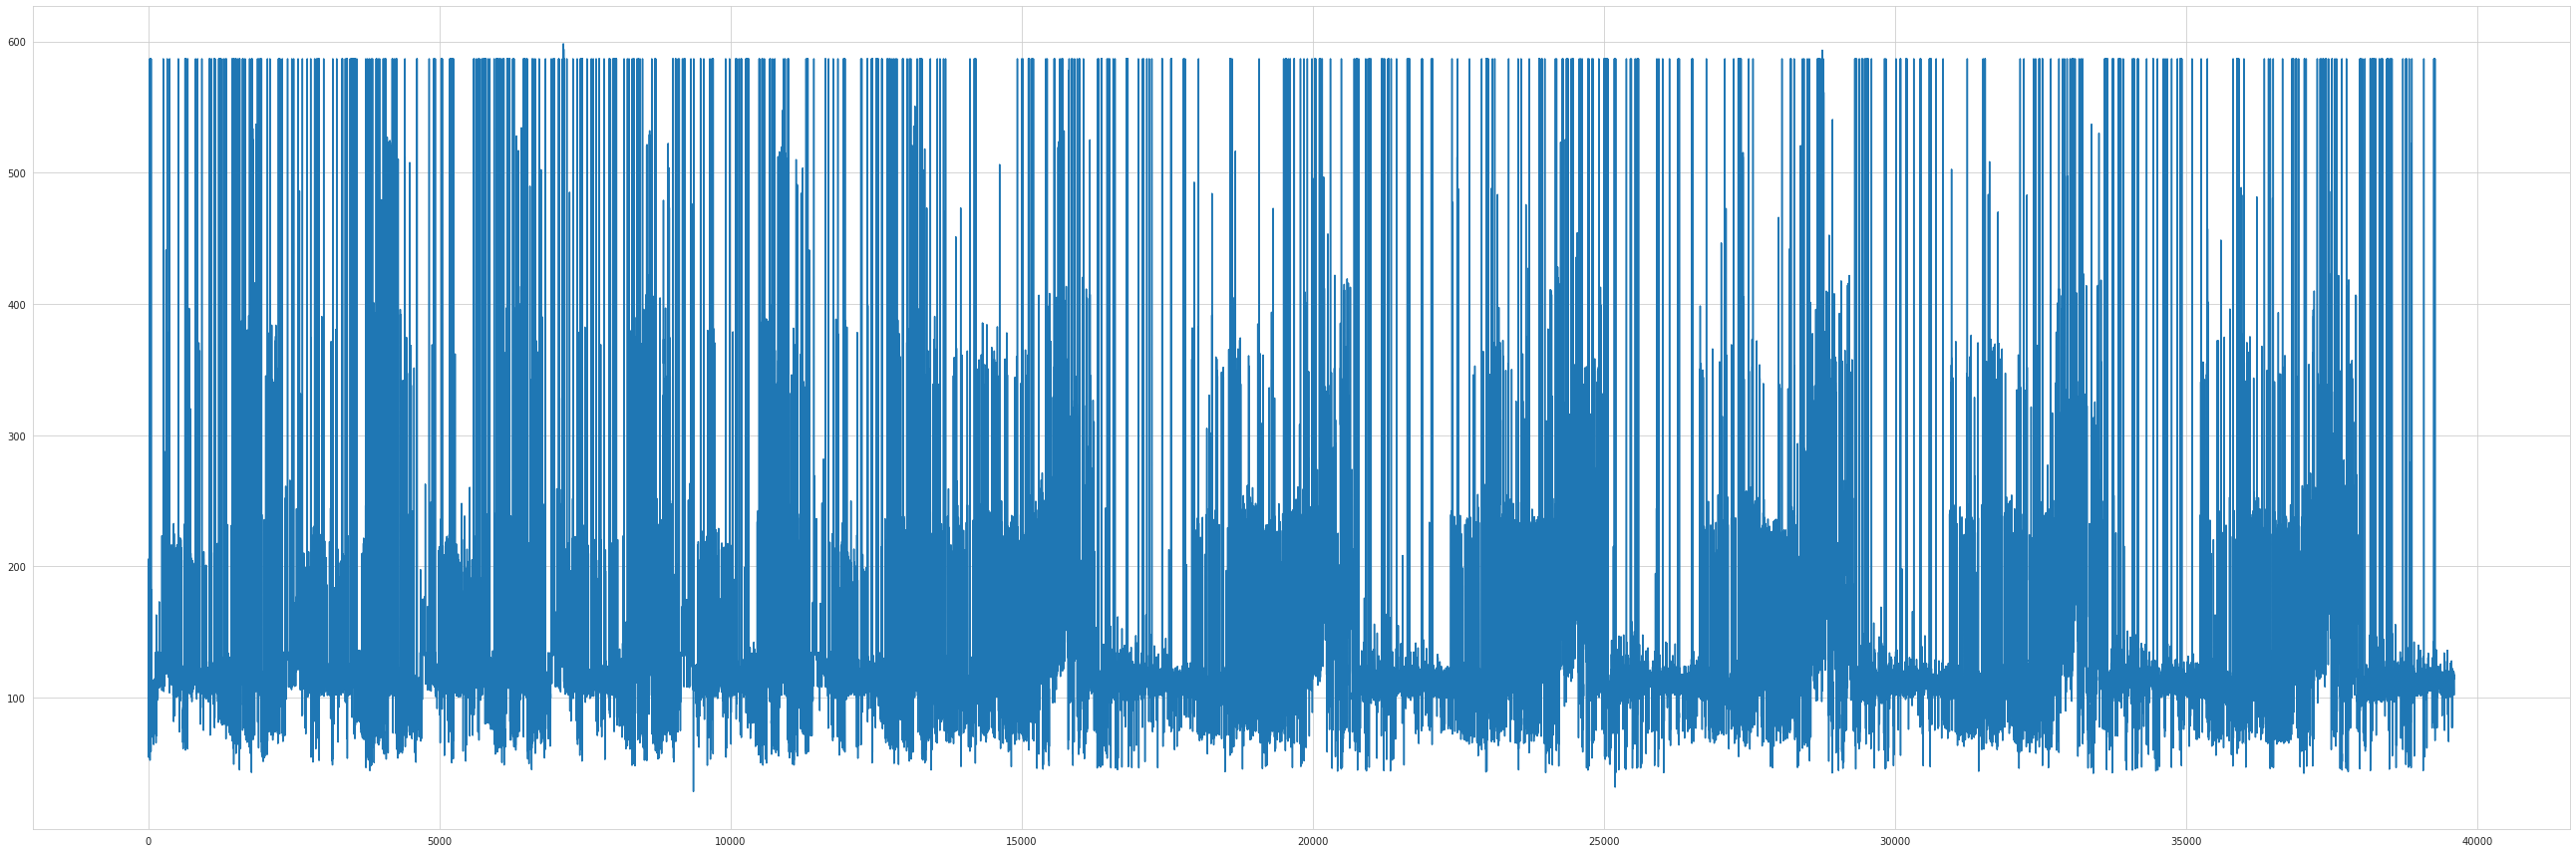

In [63]:
plt.figure(figsize=(36,12))
plt.plot(test_x["X_08"])
plt.tight_layout()

In [64]:
train_x

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,0.0,...,1,1,9706.03,137.043591,135.359219,147.837968,134.313475,125.605427,136.721425,125.028256
1,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,0.0,...,1,1,10423.43,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308
2,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,0.0,...,1,1,10948.53,132.805112,131.055355,146.814592,128.939070,127.012195,140.395688,122.238232
3,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,0.0,...,1,1,15007.03,134.138760,133.239422,139.720132,132.260824,130.723186,147.624829,134.875225
4,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,0.0,...,1,1,11051.03,142.728970,136.620022,134.853555,134.760252,125.647793,139.331105,123.272762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,66.465,103.320,62.27,1,103.150,66.825,30.20,77.83,298.05,0.0,...,1,1,60630.73,129.965741,130.807148,133.481737,125.273130,121.780933,133.780110,129.029812
39603,66.465,103.321,62.77,1,102.021,66.825,29.21,102.25,270.67,0.0,...,1,1,60763.43,127.633885,120.158764,142.667802,122.465490,122.987209,143.090741,122.811413
39604,68.504,103.320,64.67,1,103.144,68.864,29.96,102.61,198.07,0.0,...,1,1,8813.33,132.501286,136.893025,134.419328,129.115431,130.920147,140.489232,119.166699
39605,66.465,103.320,63.67,1,102.025,67.845,30.30,112.60,275.52,0.0,...,1,1,62222.33,128.189679,121.495930,141.288011,130.141676,125.518825,136.603634,124.525929


In [65]:
train_x.drop(["X_04", "X_23", "X_47", "X_48", "X_10", "X_11", "X_34", "X_36"], axis=1, inplace=True)

In [66]:
train_x

,X_01,X_02,X_03,X_05,X_06,X_07,X_08,X_09,X_12,X_13,...,X_45,X_46,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,70.544,103.320,67.47,101.892,74.983,29.45,62.38,245.71,4.34,0.18,...,0.29,1463,9706.03,137.043591,135.359219,147.837968,134.313475,125.605427,136.721425,125.028256
1,69.524,103.321,65.17,101.944,72.943,28.73,61.23,233.61,4.38,0.18,...,0.13,1463,10423.43,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308
2,72.583,103.320,64.07,103.153,72.943,28.81,105.77,272.20,4.36,0.15,...,0.14,1468,10948.53,132.805112,131.055355,146.814592,128.939070,127.012195,140.395688,122.238232
3,71.563,103.320,67.57,101.971,77.022,28.92,115.21,255.36,4.33,0.21,...,0.22,1469,15007.03,134.138760,133.239422,139.720132,132.260824,130.723186,147.624829,134.875225
4,69.524,103.320,63.57,101.981,70.904,29.68,103.38,241.46,4.35,0.16,...,0.22,1469,11051.03,142.728970,136.620022,134.853555,134.760252,125.647793,139.331105,123.272762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,66.465,103.320,62.27,103.150,66.825,30.20,77.83,298.05,4.36,0.15,...,0.11,1469,60630.73,129.965741,130.807148,133.481737,125.273130,121.780933,133.780110,129.029812
39603,66.465,103.321,62.77,102.021,66.825,29.21,102.25,270.67,4.40,0.13,...,0.12,1458,60763.43,127.633885,120.158764,142.667802,122.465490,122.987209,143.090741,122.811413
39604,68.504,103.320,64.67,103.144,68.864,29.96,102.61,198.07,4.38,0.14,...,0.13,1459,8813.33,132.501286,136.893025,134.419328,129.115431,130.920147,140.489232,119.166699
39605,66.465,103.320,63.67,102.025,67.845,30.30,112.60,275.52,4.33,0.16,...,0.11,1469,62222.33,128.189679,121.495930,141.288011,130.141676,125.518825,136.603634,124.525929


In [67]:
test_x.drop(["ID", "X_04", "X_23", "X_47", "X_48", "X_10", "X_11", "X_34", "X_36"], axis=1, inplace=True)
test_x

,X_01,X_02,X_03,X_05,X_06,X_07,X_08,X_09,X_12,X_13,...,X_45,X_46,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,68.504,103.321,76.67,101.867,73.963,30.51,63.57,239.80,4.37,0.15,...,0.16,1469,17227.63,138.130429,129.460682,141.506570,133.427229,129.711498,133.138096,121.859684
1,67.485,103.320,69.37,101.992,67.845,28.03,116.99,189.23,4.36,0.17,...,0.27,1462,17134.53,136.148839,128.266277,145.911745,131.196417,132.411480,133.629025,124.178623
2,69.524,103.320,68.97,101.884,77.022,29.65,205.68,214.93,4.43,0.20,...,0.14,1469,14860.83,120.447446,119.988804,132.099908,120.450155,130.051708,128.252972,114.475628
3,69.524,103.320,65.87,101.866,73.963,28.15,103.38,180.80,4.39,0.18,...,0.13,1469,15252.53,133.994695,125.069180,147.507669,123.142653,125.963665,139.666592,126.589253
4,73.603,103.321,66.67,101.891,74.983,29.92,71.20,231.93,4.38,0.12,...,0.09,1469,10752.23,137.918202,135.116192,138.600473,127.173033,137.252712,134.411335,124.020016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39603,68.504,103.320,63.97,103.157,68.864,29.49,116.35,284.16,4.35,0.14,...,0.11,1469,62123.53,127.741246,126.494312,139.119905,125.271109,128.284572,140.176945,128.292843
39604,68.504,103.320,61.37,103.137,68.864,32.29,116.28,272.41,4.34,0.16,...,0.19,1469,61844.13,127.767377,124.062809,138.238664,119.879393,127.322529,137.312047,131.570614
39605,69.524,103.320,63.67,103.149,69.884,30.00,113.05,295.54,4.38,0.16,...,0.12,1469,60277.53,128.593640,124.774037,138.659624,123.999571,126.075542,135.656132,127.671108
39606,67.485,103.321,61.77,103.148,67.845,32.05,115.05,267.26,4.37,0.16,...,0.11,1469,60236.73,121.110646,125.471699,134.989984,120.889578,129.296909,132.673977,131.882893


## Modeling

In [68]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 74 kB/s 


In [70]:
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor

These algorithms were top7 algorithms worked well to Y_01 from pycaret.py file

In [71]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma = 0, subsample=0.75, colsample_bytree=1, max_depth=7)
lgb = LGBMRegressor()
gb = GradientBoostingRegressor()
rf = RandomForestRegressor()
cb = CatBoostRegressor(depth = 10, l2_leaf_reg = 1, learning_rate = 0.1)
et = ExtraTreesRegressor()

In [72]:
er = MultiOutputRegressor(VotingRegressor([("xgb", xgb), ("lgb", lgb), ("gb", gb), ("rf", rf), ("cb", cb), ("et", et)]))

In [ ]:
er = er.fit(train_x, train_y)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
5:	learn: 0.4127988	total: 568ms	remaining: 1m 34s
6:	learn: 0.4117135	total: 670ms	remaining: 1m 35s
7:	learn: 0.4109086	total: 761ms	remaining: 1m 34s
8:	learn: 0.4100079	total: 851ms	remaining: 1m 33s
9:	learn: 0.4088671	total: 957ms	remaining: 1m 34s
10:	learn: 0.4080497	total: 1.04s	remaining: 1m 34s
11:	learn: 0.4069591	total: 1.14s	remaining: 1m 33s
12:	learn: 0.4061350	total: 1.24s	remaining: 1m 33s
13:	learn: 0.4054987	total: 1.33s	remaining: 1m 33s
14:	learn: 0.4046040	total: 1.43s	remaining: 1m 33s
15:	learn: 0.4037476	total: 1.53s	remaining: 1m 34s
16:	learn: 0.4029601	total: 1.62s	remaining: 1m 33s
17:	learn: 0.4022200	total: 1.71s	remaining: 1m 33s
18:	learn: 0.4013837	total: 1.82s	remaining: 1m 33s
19:	learn: 0.4008620	total: 1.91s	remaining: 1m 33s
20:	learn: 0.4004228	total: 2s	remaining: 1m 33s
21:	learn: 0.3998702	total: 2.09s	remaining: 1m 33s
22:	learn: 0.3993075	total: 2.18s	remaining: 1m 32s
23:	learn: 0.3985488	total: 2.27s	re

In [ ]:
preds = er.predict(test_x)
print("Done")

In [ ]:
submission = pd.read_csv("/content/drive/MyDrive/DACON/LG/sample_submission.csv")

In [ ]:
for idx, col in enumerate(submission.columns):
    if col=='ID':
        continue
    submission[col] = preds[:,idx-1]
print('Done.')

In [ ]:
submission.to_csv('/content/drive/MyDrive/DACON/LG/final.csv', index=False)